In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import phik
from phik.report import plot_correlation_matrix
from phik import phik

from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("rebill_rate.csv")
df.head(10)

,customer_account_id,own_started_at,order_id,amount_usd,gross_amount_usd,month,offer,currency,payment_type,payment_method,...,week_date,date,geo,paid_count,retry_count,month_started_at,utm_source,trial_period,period,next_billing_date
0,150341.0,2024-01-13 21:18:43+00:00,73a188ce-e9b3-4c6b-9846-2d20686d7615,2999.0,29.99,2024-11-01 00:00:00+00:00,Monthly,USD,recurring,card,...,2024-11-18,2024-11-21,T1,11,0,2024-01-01 00:00:00+00:00,google,84,28,2024-12-19
1,1113492.0,2024-11-21 00:00:00+00:00,pay_pbmemansyi3utmv5wjy45r4lnu,4999.0,49.99,2024-11-01 00:00:00+00:00,1Week,USD,upsell,card,...,2024-11-18,2024-11-21,T1,-2,0,2024-11-01 00:00:00+00:00,TikTok,7,28,2024-12-19
2,1122629.0,2024-11-21 00:00:00+00:00,pay_ymj2aj3goauuzlhx2gwbpvc634,4999.0,49.99,2024-11-01 00:00:00+00:00,1Week,USD,upsell,card,...,2024-11-18,2024-11-21,WW,-2,0,2024-11-01 00:00:00+00:00,google,7,28,2024-12-19
3,1123274.0,2024-11-21 00:00:00+00:00,pay_4t26twek4waefcwafnyymvqzsa,4999.0,49.99,2024-11-01 00:00:00+00:00,1Week,USD,upsell,card,...,2024-11-18,2024-11-21,WW,-2,0,2024-11-01 00:00:00+00:00,google,7,28,2024-12-19
4,1123541.0,2024-11-21 00:00:00+00:00,pay_4fxtglsjclpefogxzubxz57ni4,4999.0,49.99,2024-11-01 00:00:00+00:00,1Week,USD,upsell,card,...,2024-11-18,2024-11-21,T1,-2,0,2024-11-01 00:00:00+00:00,TikTok,7,28,2024-12-19
5,1125788.0,2024-11-21 00:00:00+00:00,pay_ck7mmwale3de7gbyl735qwtfaa,4999.0,49.99,2024-11-01 00:00:00+00:00,1Week,USD,upsell,card,...,2024-11-18,2024-11-21,WW,-2,0,2024-11-01 00:00:00+00:00,google,7,28,2024-12-19
6,535993.0,2024-08-22 00:00:00+00:00,pay_d7r3w4vuk6nenjvktfy6no3ueq,3895.0,38.95,2024-11-01 00:00:00+00:00,1Week,USD,recurring,card,...,2024-11-18,2024-11-21,T1,4,0,2024-08-01 00:00:00+00:00,google,7,28,2024-12-19
7,633787.0,2024-07-25 00:00:00+00:00,pay_fbdp3bmascje5cwuu2psky6wz4,3895.0,38.95,2024-11-01 00:00:00+00:00,1Week,USD,recurring,card,...,2024-11-18,2024-11-21,T1,5,0,2024-07-01 00:00:00+00:00,google,7,28,2024-12-19
8,714338.0,2024-08-22 00:00:00+00:00,pay_tooyb35cvmvufeukeawduyshb4,3895.0,38.95,2024-11-01 00:00:00+00:00,1Week,USD,recurring,card,...,2024-11-18,2024-11-21,T1,4,0,2024-08-01 00:00:00+00:00,google,7,28,2024-12-19
9,826040.0,2024-09-19 00:00:00+00:00,pay_5g262tx6c26uzb7vtcdtvbtzte,3895.0,38.95,2024-11-01 00:00:00+00:00,1Week,USD,recurring,card,...,2024-11-18,2024-11-21,T1,3,0,2024-09-01 00:00:00+00:00,google,7,28,2024-12-19


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_account_id,86961.0,617421.277573,284468.738612,1650.0,413411.00,626193.00,840756.00,1.138427e+06
amount_usd,87077.0,2146.917564,1433.612976,0.0,1129.00,1519.00,3895.00,9.900000e+03
gross_amount_usd,87077.0,21.466925,14.331650,0.0,11.29,15.19,38.95,7.067691e+01
bin,86782.0,484945.561983,46905.169858,222806.0,447810.00,483028.00,530352.00,6.788650e+05
paid_count,87077.0,0.566166,1.245397,-10.0,0.00,0.00,1.00,1.200000e+01
retry_count,87077.0,0.159101,0.723323,-10.0,0.00,0.00,0.00,6.000000e+00
trial_period,87077.0,29.089829,22.945337,7.0,7.00,28.00,28.00,8.400000e+01
period,87077.0,31.574400,13.689127,28.0,28.00,28.00,28.00,8.400000e+01


In [5]:
df.describe(include="object").T

,count,unique,top,freq
own_started_at,87077,69175,2024-09-15 05:00:00+00:00,133
order_id,87077,87077,73a188ce-e9b3-4c6b-9846-2d20686d7615,1
month,87077,12,2024-10-01 00:00:00+00:00,14274
offer,87077,5,4Week,50830
currency,87077,8,USD,86849
payment_type,87077,3,first,54587
payment_method,87077,5,card,54872
card_brand,86771,5,Visa,50687
week_day,87077,7,Friday,14658
channel,87077,2,checkout,72769


In [6]:
df.dtypes

customer_account_id    float64
own_started_at          object
order_id                object
amount_usd             float64
gross_amount_usd       float64
month                   object
offer                   object
currency                object
payment_type            object
payment_method          object
card_brand              object
week_day                object
bin                    float64
channel                 object
mid                     object
created_at              object
geo_country             object
card_country            object
week_date               object
date                    object
geo                     object
paid_count               int64
retry_count              int64
month_started_at        object
utm_source              object
trial_period             int64
period                   int64
next_billing_date       object
dtype: object

In [7]:
date_features = ["own_started_at", "month", "created_at", "week_date", "date", "month_started_at", "next_billing_date"]
for feature in date_features:
    df[feature] = pd.to_datetime(df[feature], utc=True)

In [8]:
for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

customer_account_id: 116
own_started_at: 0
order_id: 0
amount_usd: 0
gross_amount_usd: 0
month: 0
offer: 0
currency: 0
payment_type: 0
payment_method: 0
card_brand: 306
week_day: 0
bin: 295
channel: 0
mid: 280
created_at: 0
geo_country: 9454
card_country: 391
week_date: 0
date: 0
geo: 0
paid_count: 0
retry_count: 0
month_started_at: 0
utm_source: 367
trial_period: 0
period: 0
next_billing_date: 0


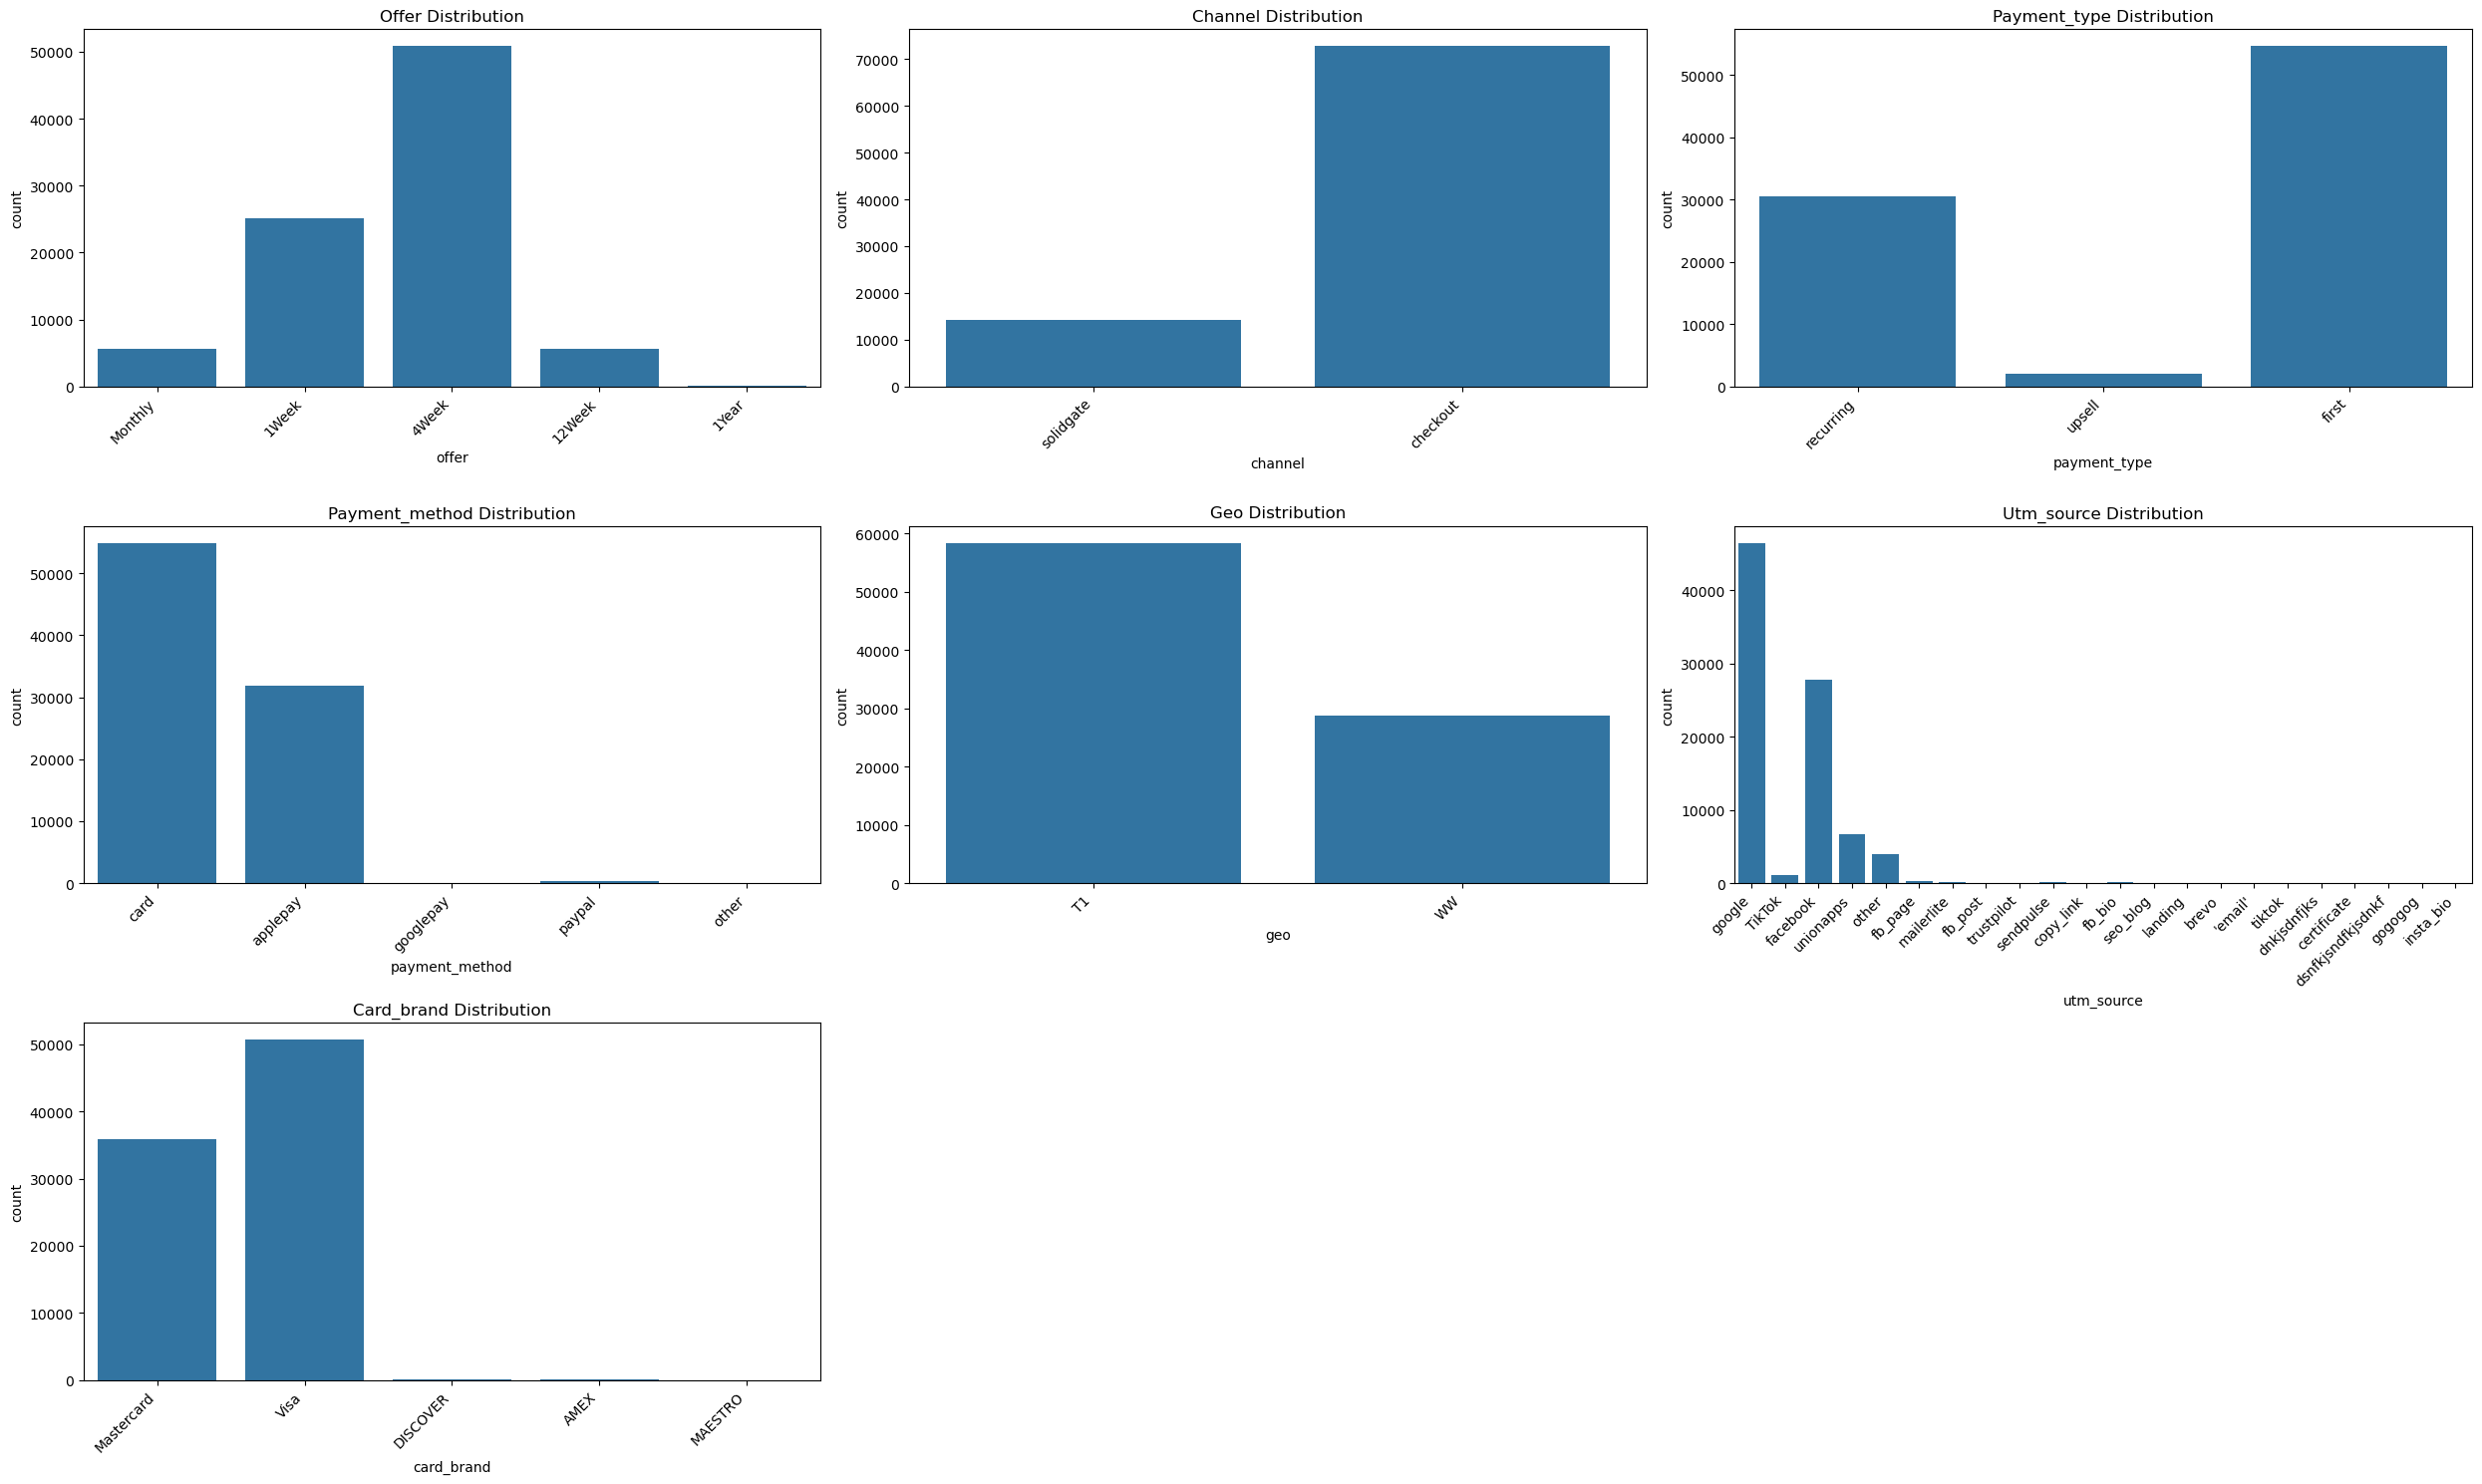

In [9]:
# General Distributions
plt.figure(figsize=(25, 15))
categorical_features = ["offer", "channel", "payment_type", "payment_method", "geo", "utm_source", "card_brand"]

for idx, feature in enumerate(categorical_features, start=1):
    plt.subplot(3, 3, idx)

    sns.countplot(data=df, x=feature)
    plt.title(f"{feature.capitalize()} Distribution")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

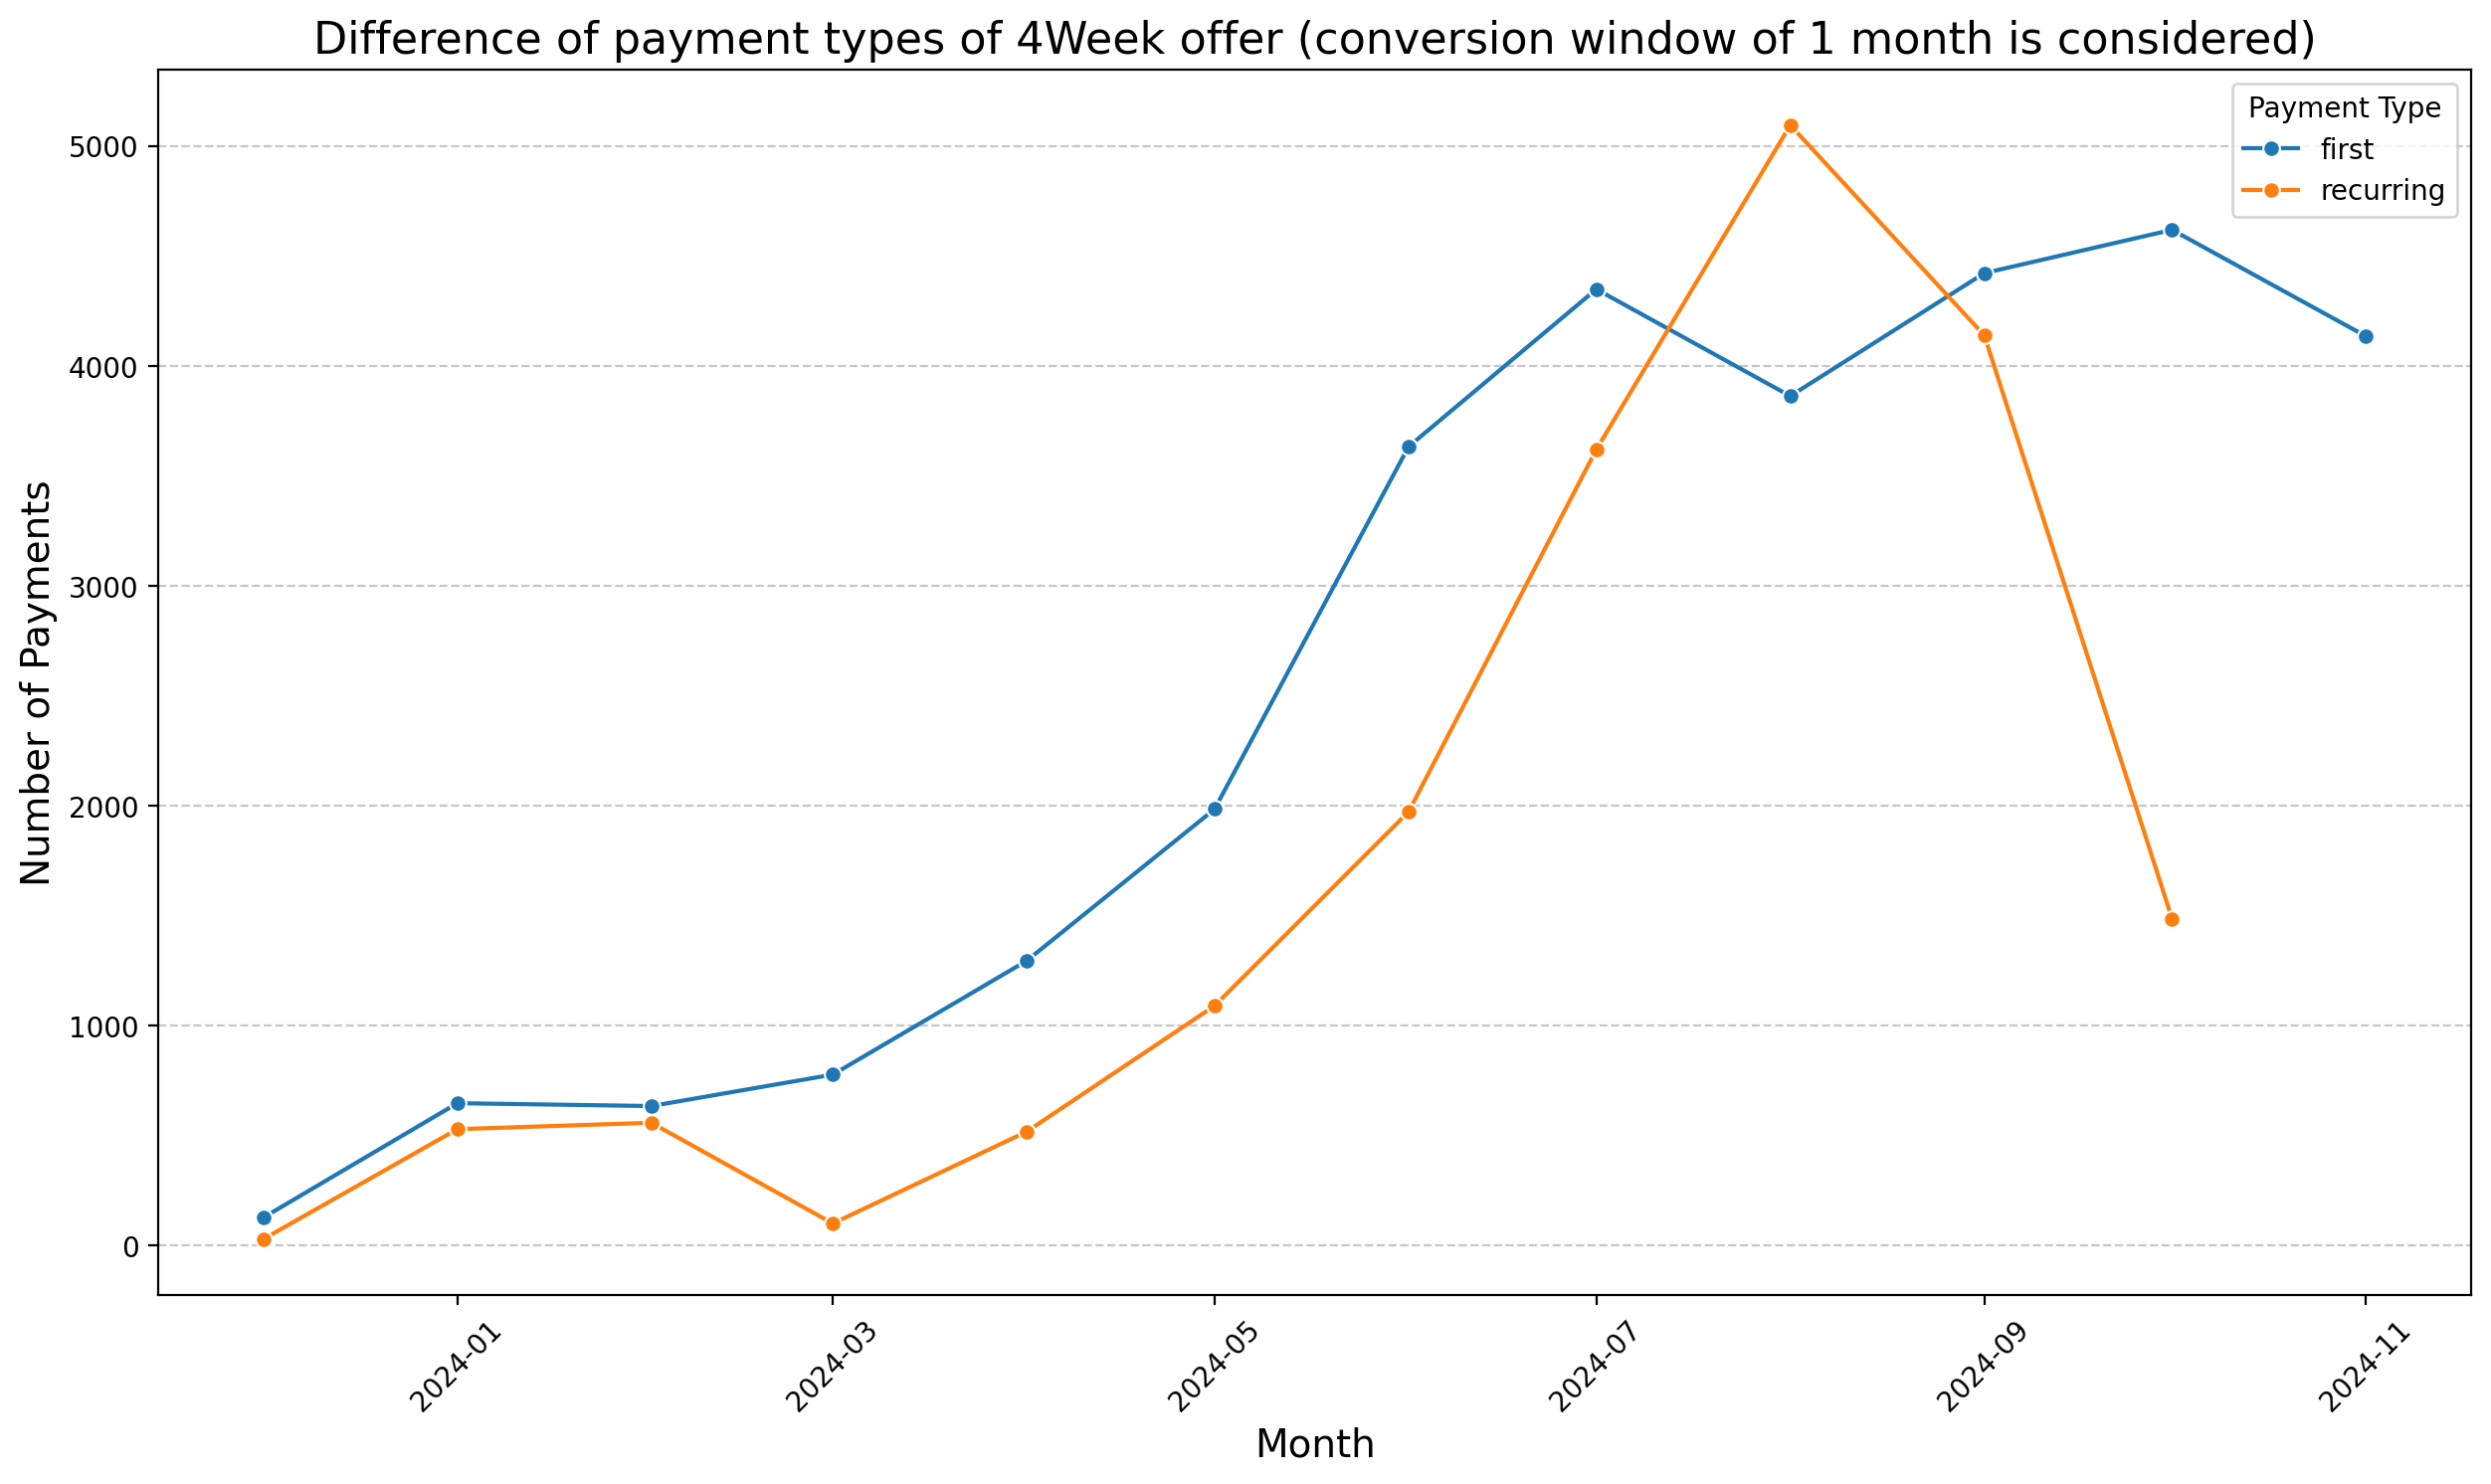

In [10]:
first_payments = df[(df["payment_type"] == "first") & (df["offer"] == "4Week")].copy()
recurring_payments = df[(df["payment_type"] == "recurring") & (df["offer"] == "4Week")].copy()

first_payments_by_month = first_payments.groupby("month_started_at").agg({"order_id": "count"}).reset_index()
first_payments_by_month["payment_type"] = "first"

recurring_payments_by_month = recurring_payments.groupby("month_started_at").agg({"order_id": "count"}).reset_index()
recurring_payments_by_month["payment_type"] = "recurring"

payments_by_month = pd.concat([first_payments_by_month, recurring_payments_by_month])
payments_by_month.rename(columns={"order_id": "payment_count"}, inplace=True)

plt.figure(figsize=(15, 8), dpi=200)
sns.lineplot(data=payments_by_month, x="month_started_at", y="payment_count", hue="payment_type", marker="o")

plt.title("Difference of payment types of 4Week offer (conversion window of 1 month is considered)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Payments", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Payment Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


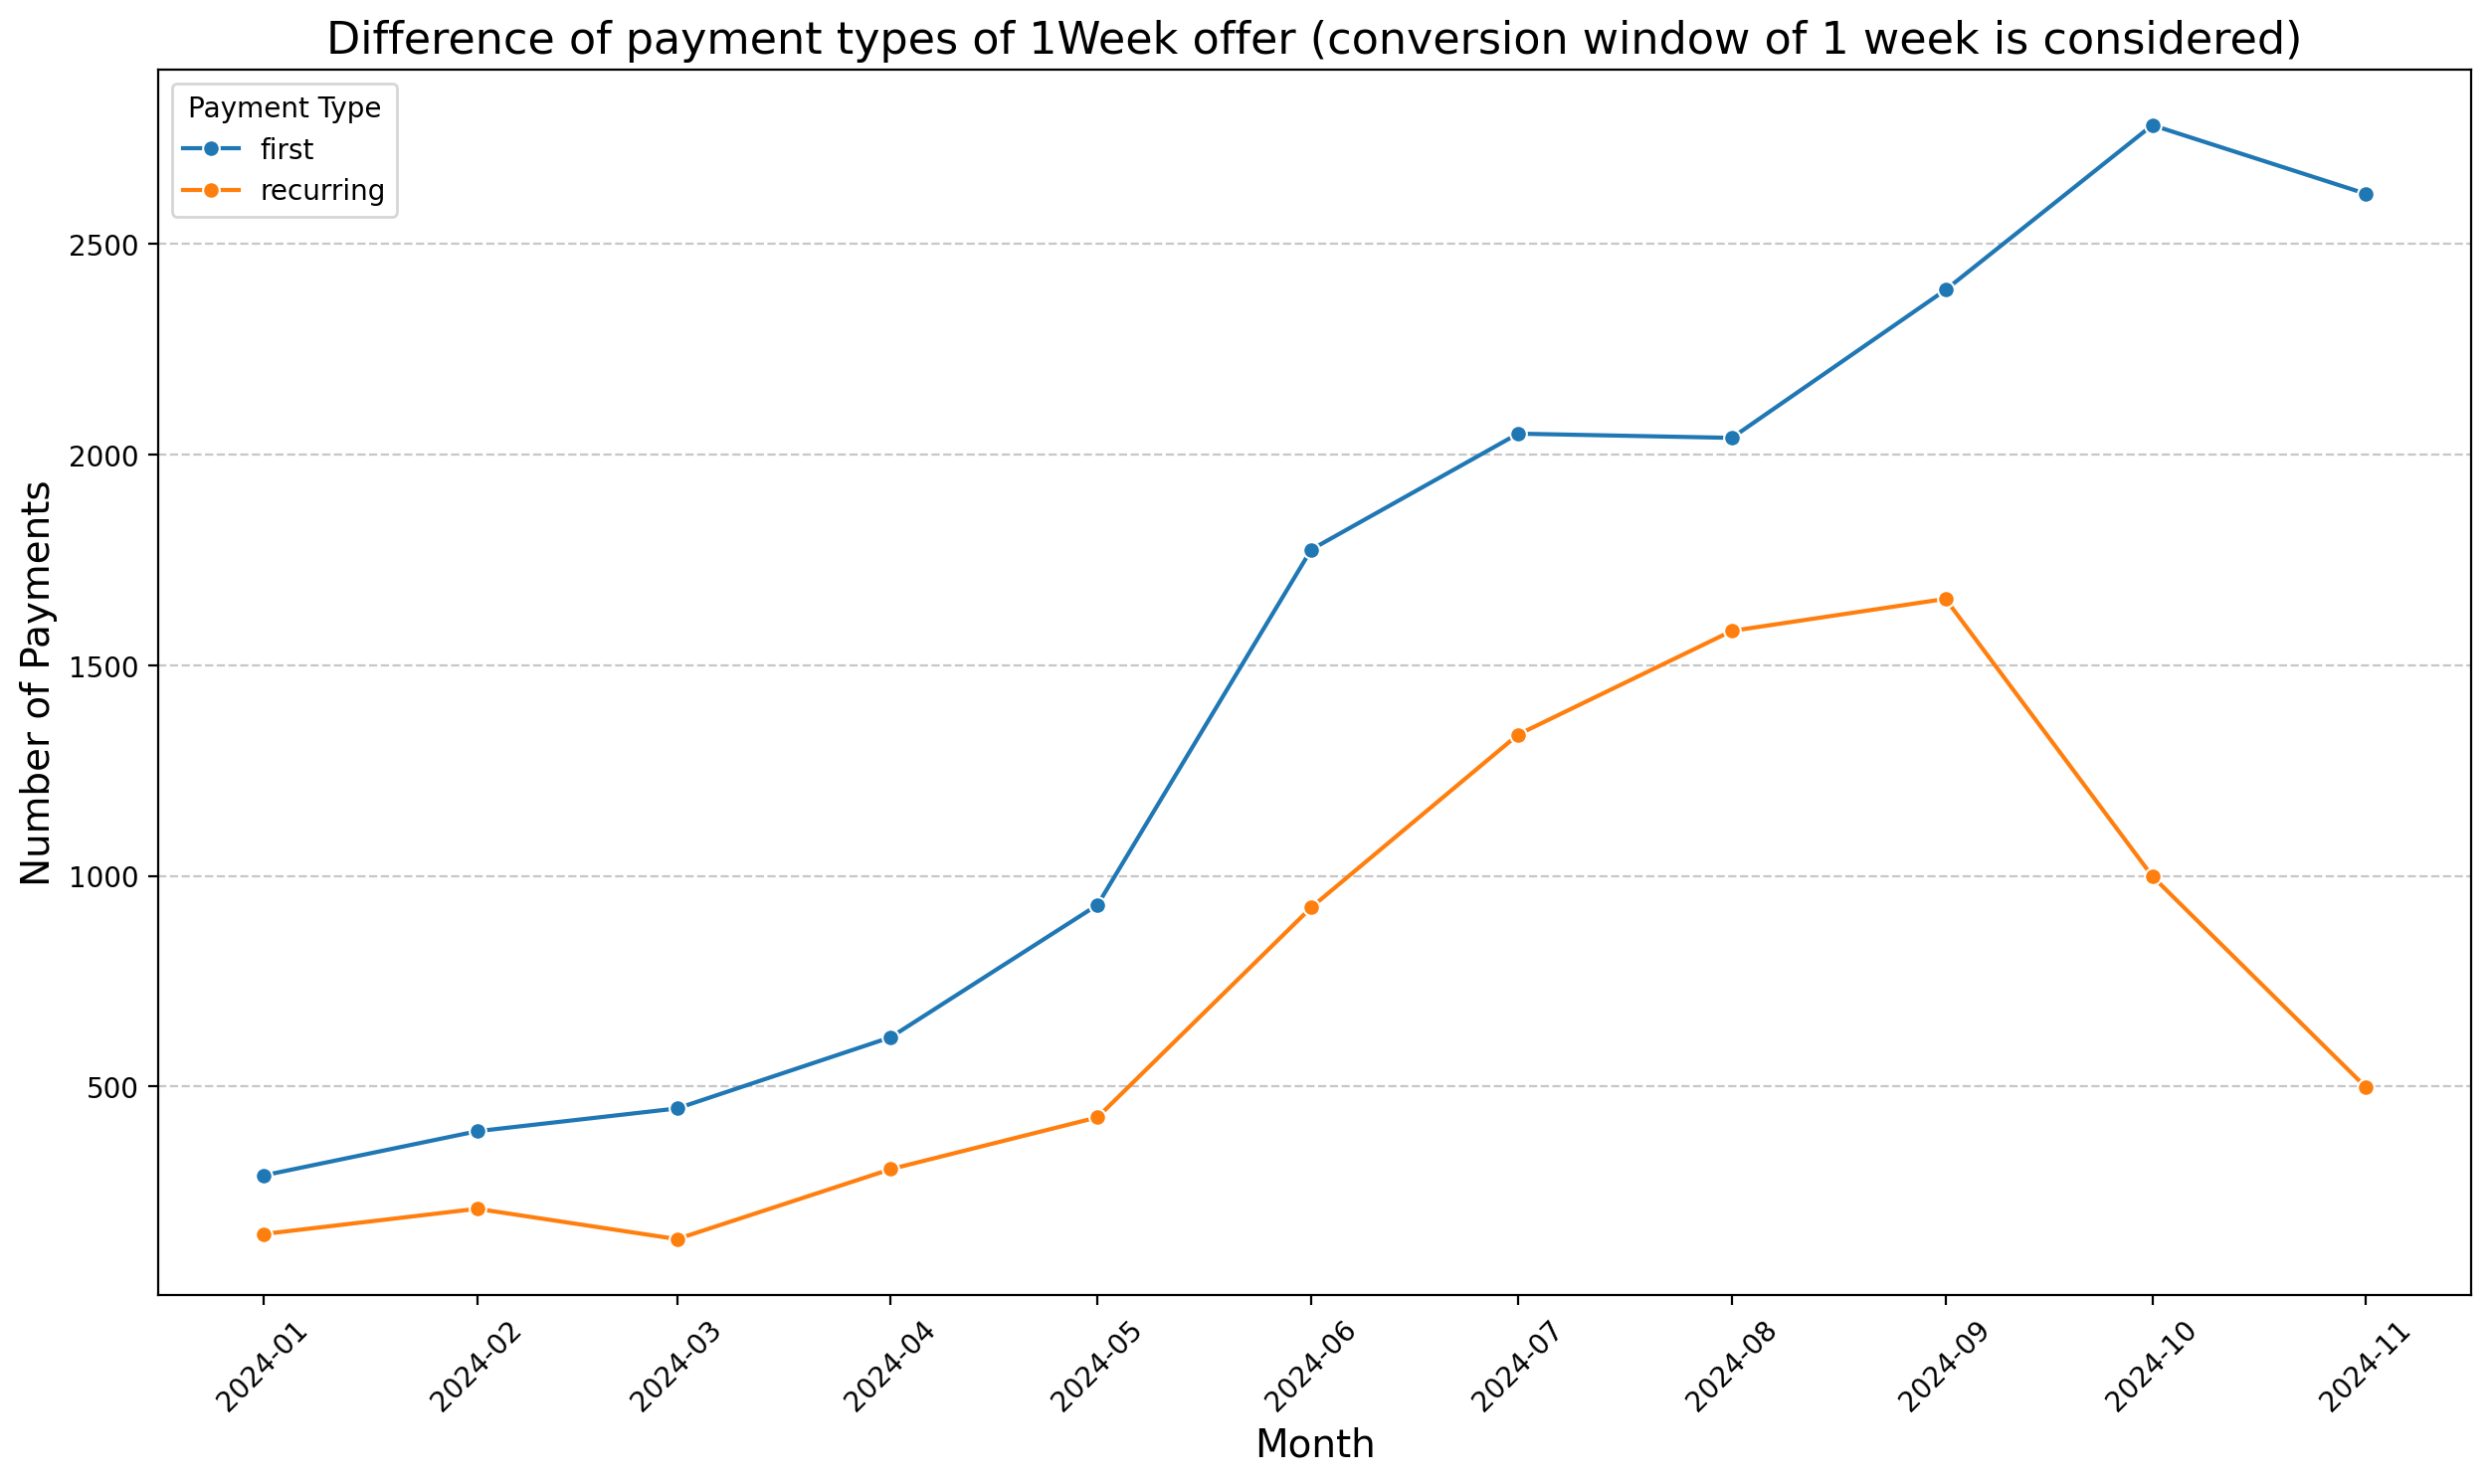

In [11]:
first_payments = df[(df["payment_type"] == "first") & (df["offer"] == "1Week")].copy()
recurring_payments = df[(df["payment_type"] == "recurring") & (df["offer"] == "1Week")].copy()

first_payments_by_month = first_payments.groupby("month_started_at").agg({"order_id": "count"}).reset_index()
first_payments_by_month["payment_type"] = "first"

recurring_payments_by_month = recurring_payments.groupby("month_started_at").agg({"order_id": "count"}).reset_index()
recurring_payments_by_month["payment_type"] = "recurring"

payments_by_month = pd.concat([first_payments_by_month, recurring_payments_by_month])
payments_by_month.rename(columns={"order_id": "payment_count"}, inplace=True)

plt.figure(figsize=(15, 8), dpi=200)
sns.lineplot(data=payments_by_month, x="month_started_at", y="payment_count", hue="payment_type", marker="o")

plt.title("Difference of payment types of 1Week offer (conversion window of 1 week is considered)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Payments", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Payment Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


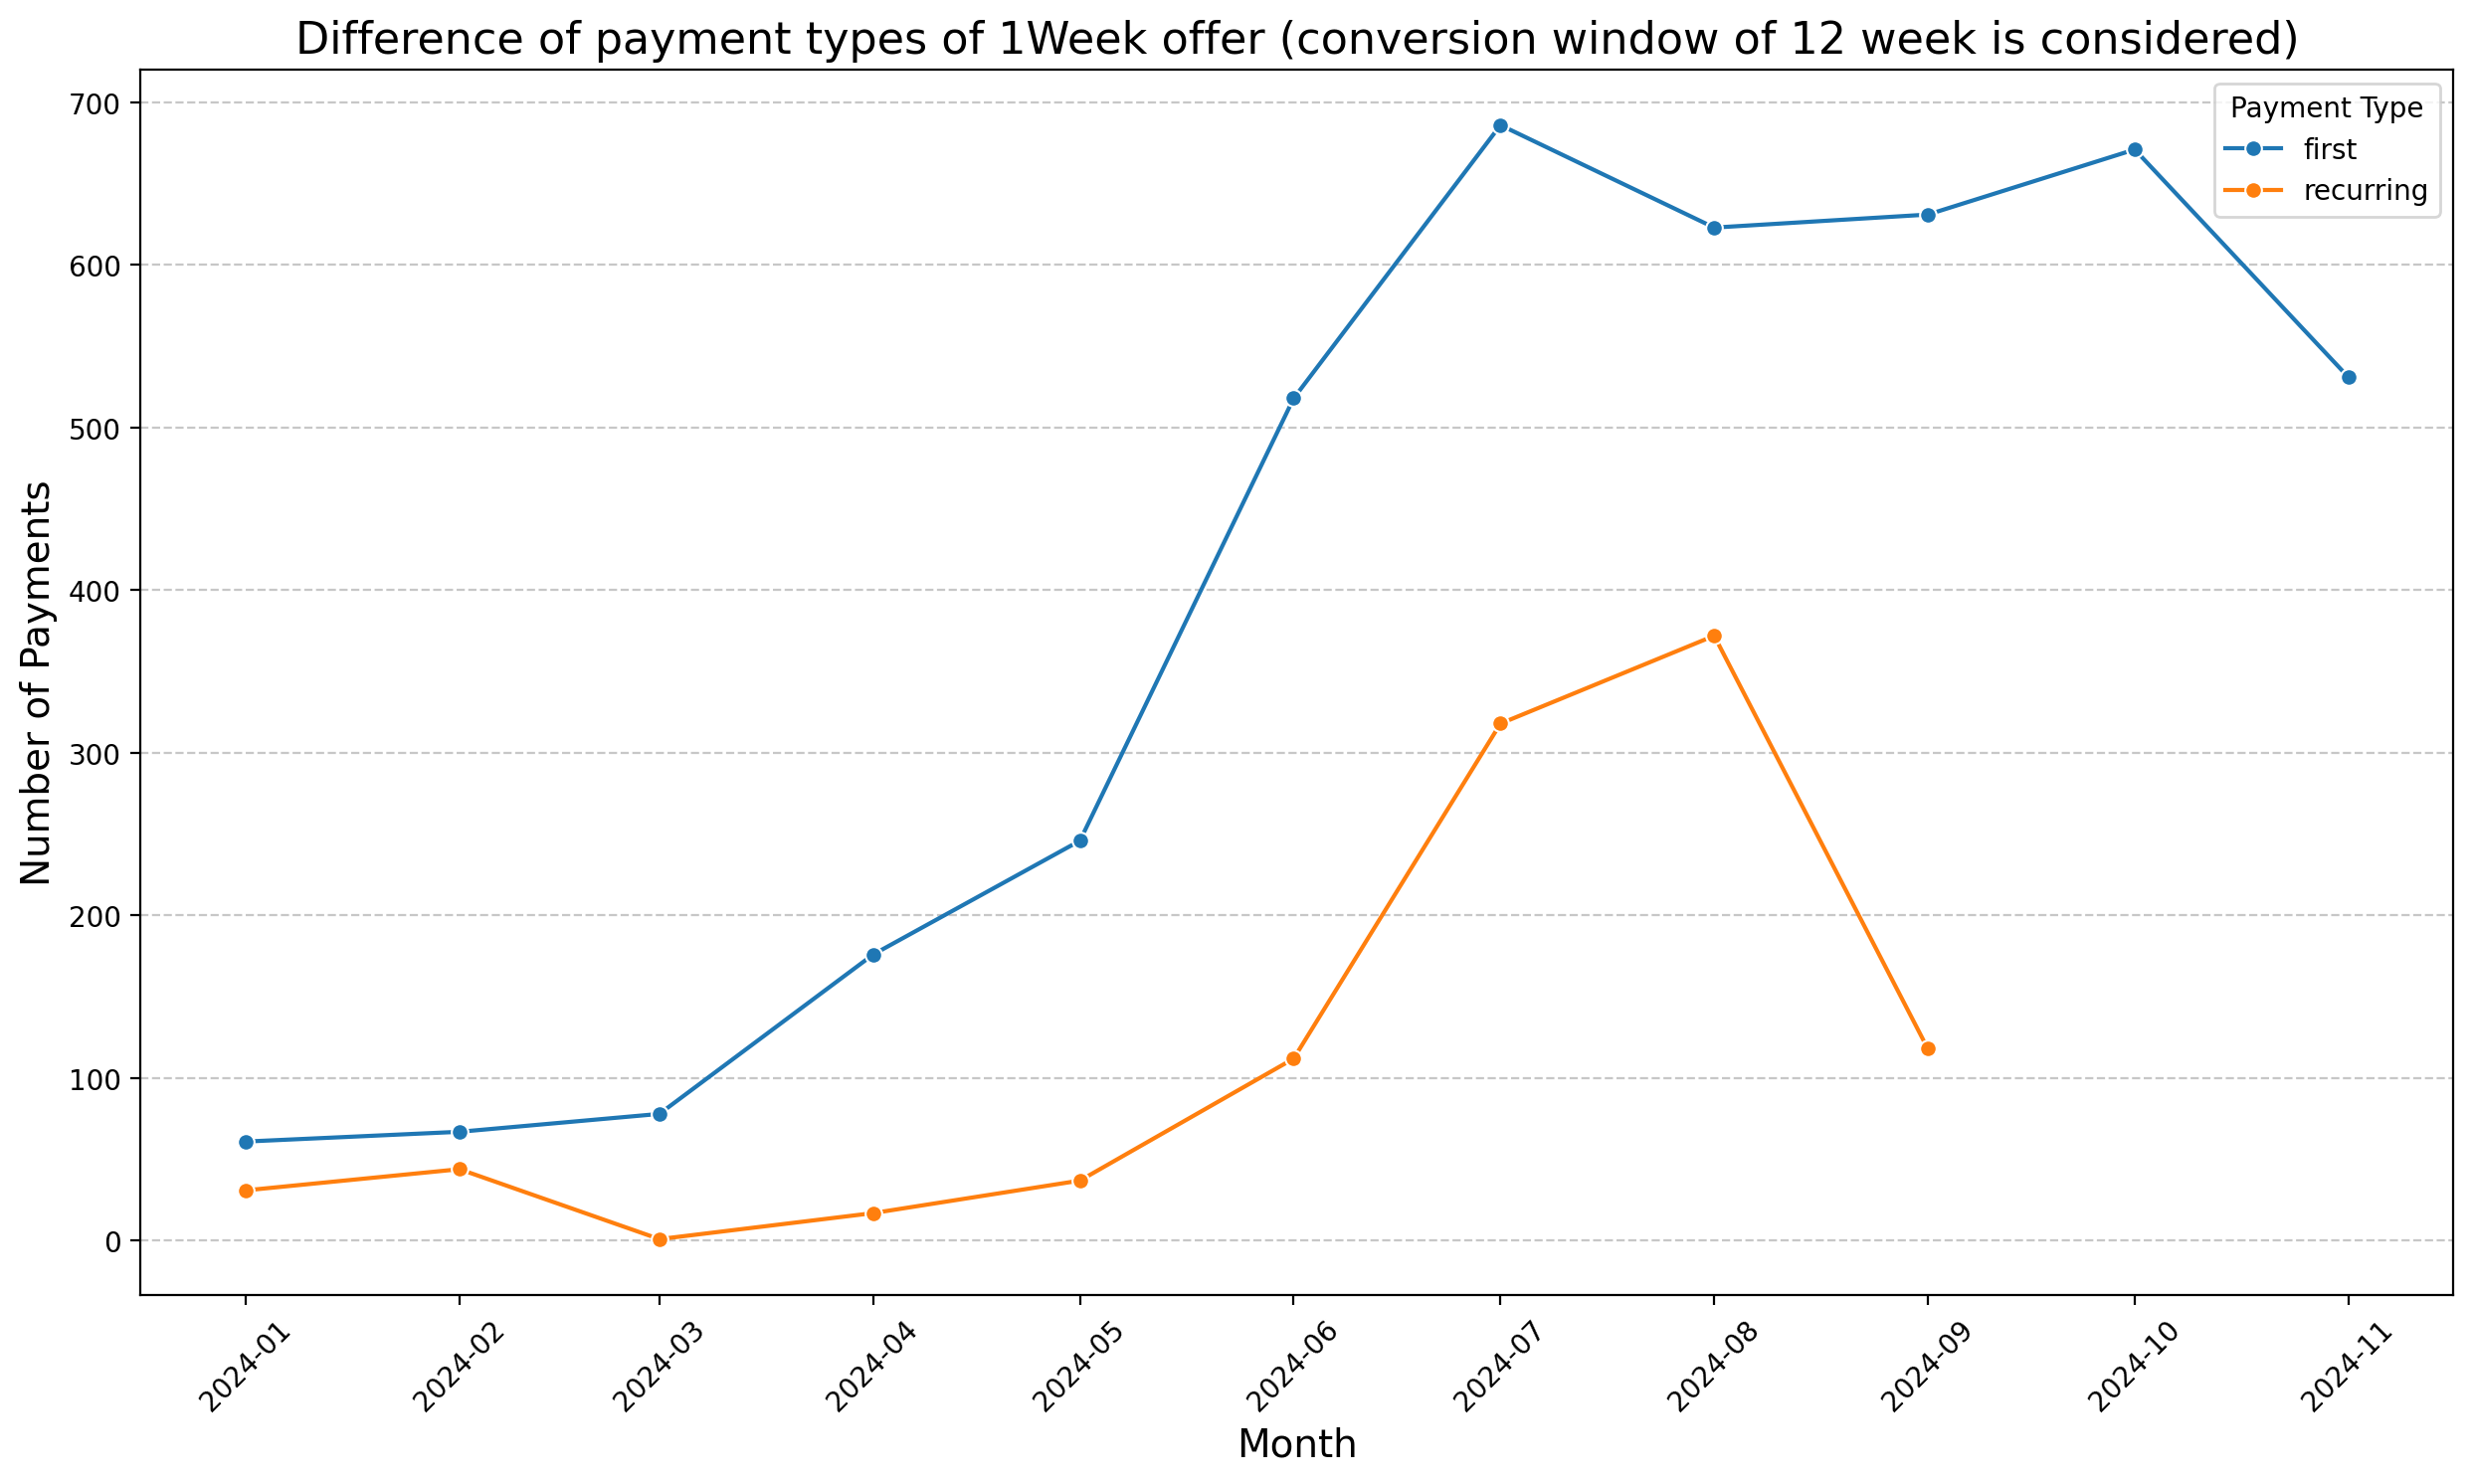

In [12]:
first_payments = df[(df["payment_type"] == "first") & (df["offer"] == "12Week")].copy()
recurring_payments = df[(df["payment_type"] == "recurring") & (df["offer"] == "12Week")].copy()

first_payments_by_month = first_payments.groupby("month_started_at").agg({"order_id": "count"}).reset_index()
first_payments_by_month["payment_type"] = "first"

recurring_payments_by_month = recurring_payments.groupby("month_started_at").agg({"order_id": "count"}).reset_index()
recurring_payments_by_month["payment_type"] = "recurring"

payments_by_month = pd.concat([first_payments_by_month, recurring_payments_by_month])
payments_by_month.rename(columns={"order_id": "payment_count"}, inplace=True)

plt.figure(figsize=(15, 8), dpi=200)
sns.lineplot(data=payments_by_month, x="month_started_at", y="payment_count", hue="payment_type", marker="o")

plt.title("Difference of payment types of 1Week offer (conversion window of 12 week is considered)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Payments", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Payment Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [13]:
first_payments = df[df["payment_type"] == "first"].copy()
new_users_daily = first_payments.groupby("date").aggregate({"customer_account_id": "nunique"})
new_users_daily

,customer_account_id
date,
2023-12-13 00:00:00+00:00,3
2023-12-14 00:00:00+00:00,16
2023-12-15 00:00:00+00:00,47
2023-12-16 00:00:00+00:00,63
2023-12-17 00:00:00+00:00,53
...,...
2024-11-20 00:00:00+00:00,279
2024-11-21 00:00:00+00:00,268
2024-11-22 00:00:00+00:00,229


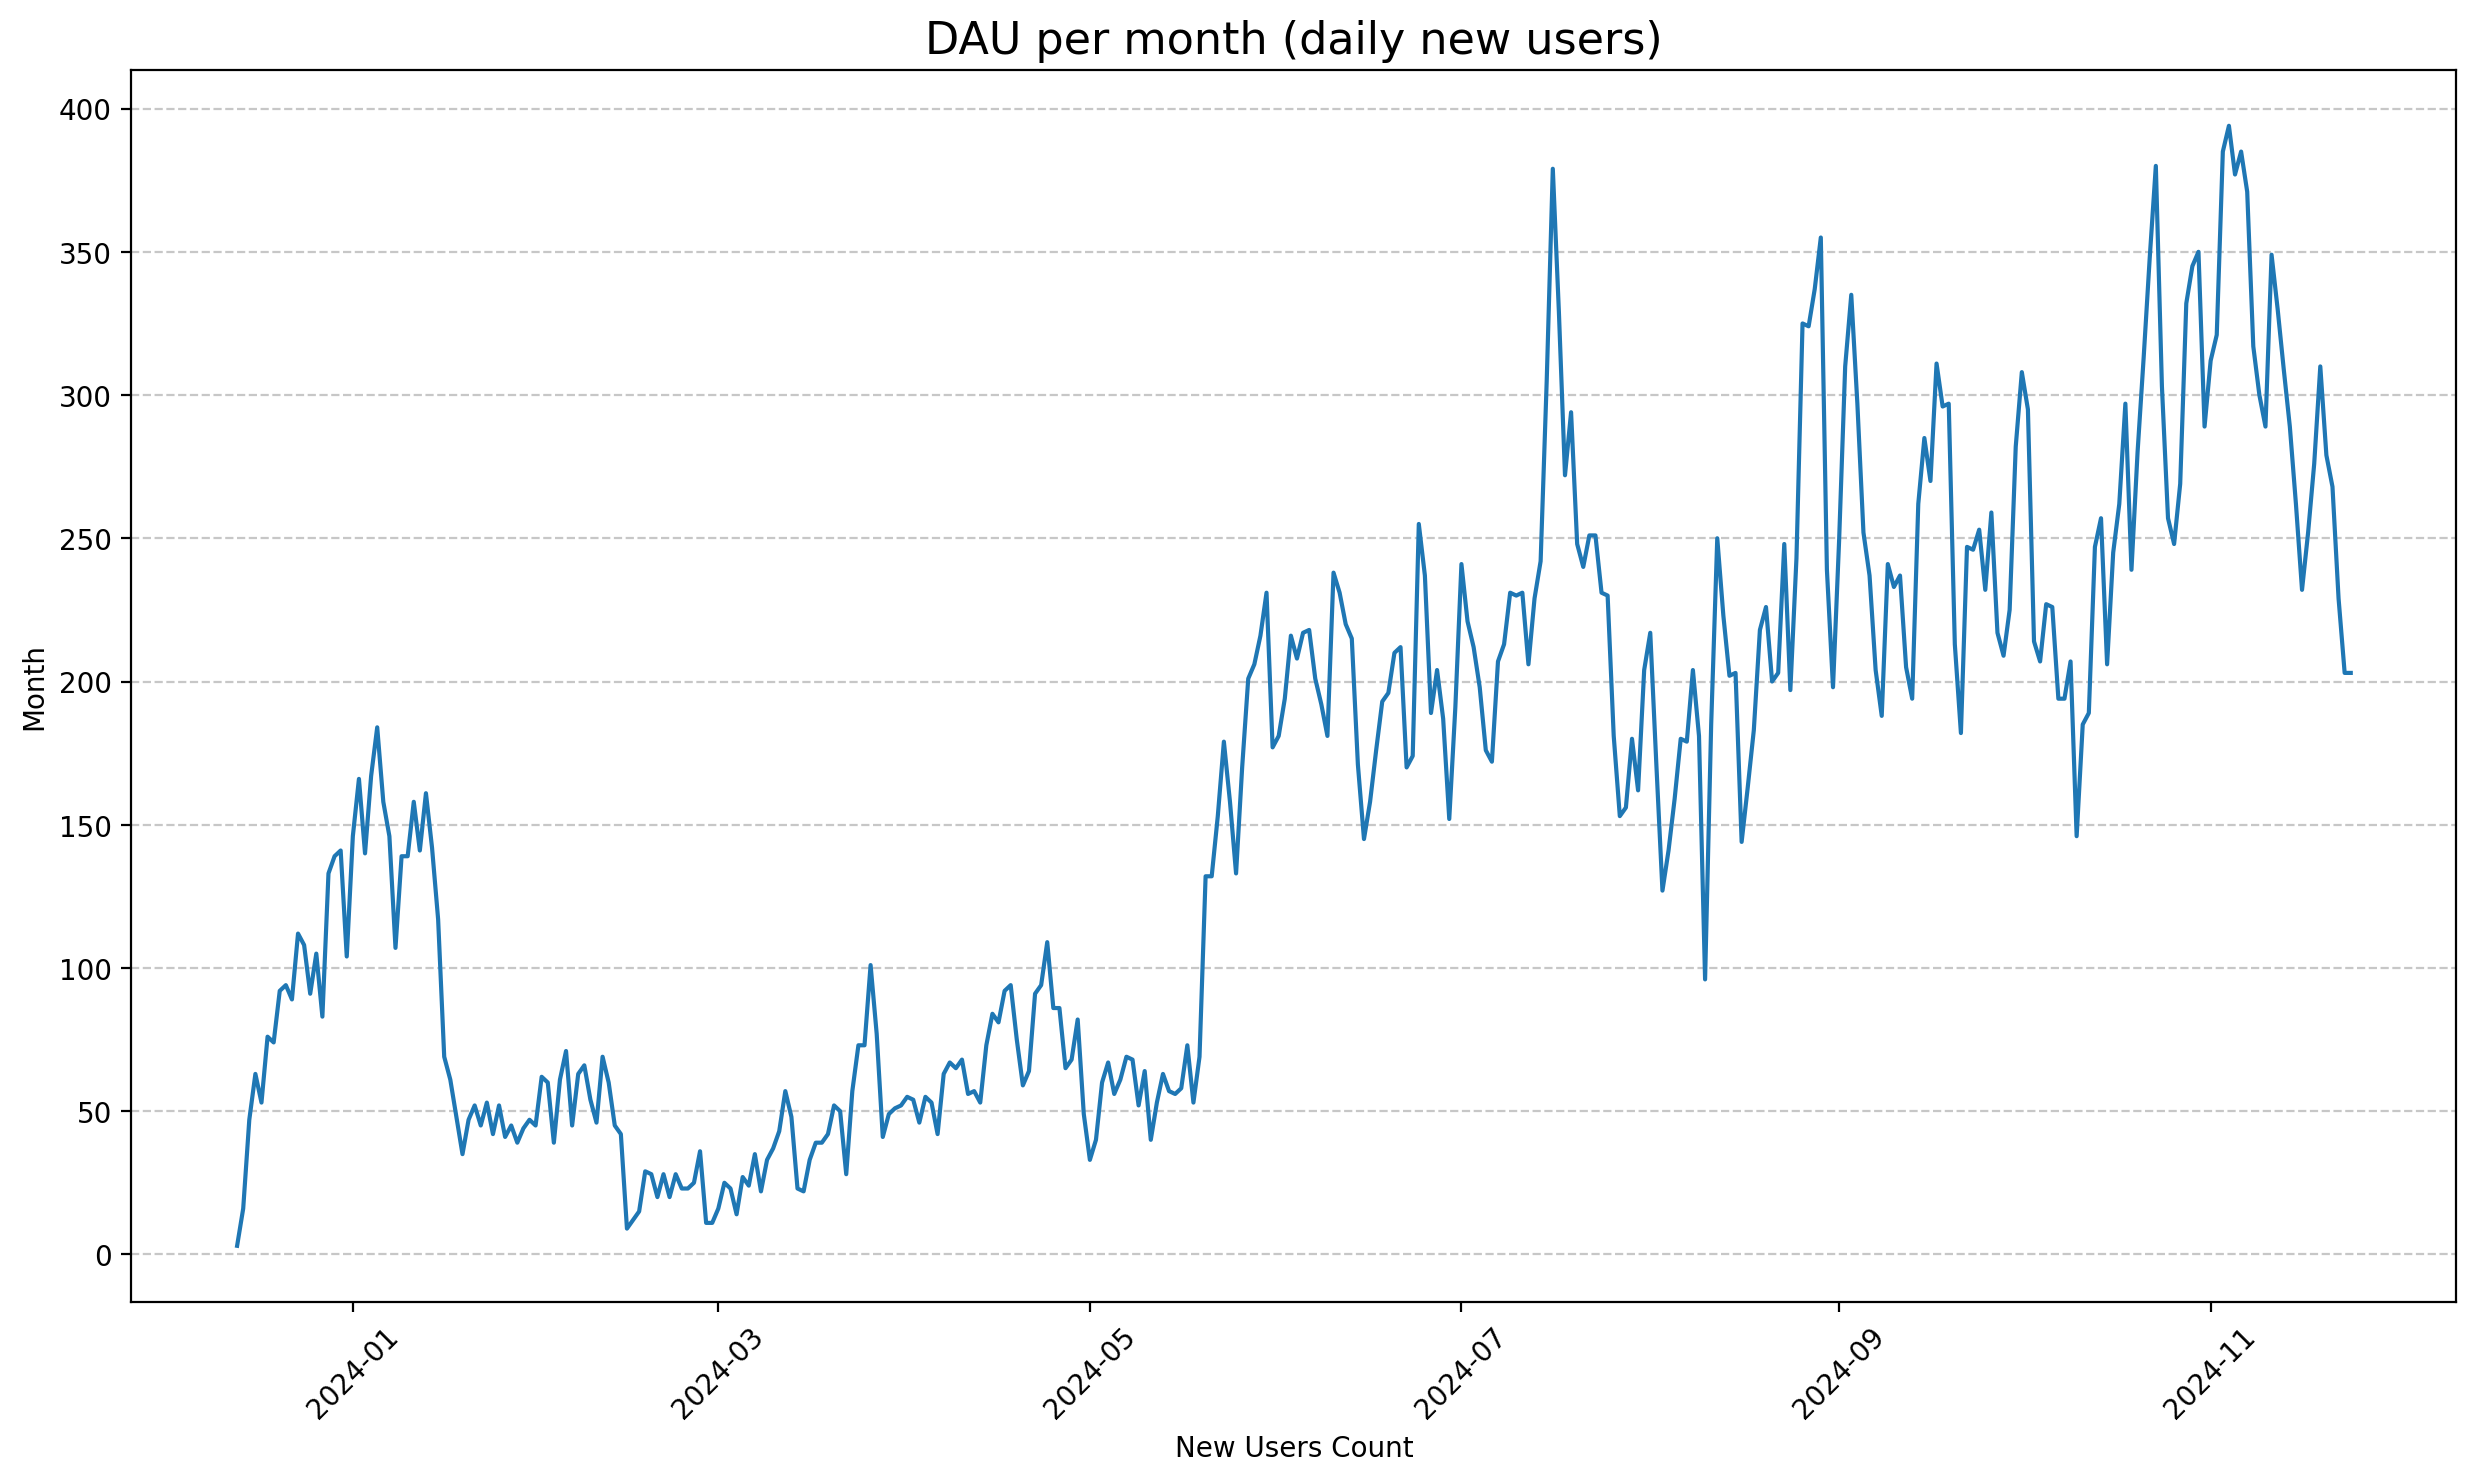

In [14]:
plt.figure(figsize=(15, 8), dpi=200)
sns.lineplot(data=new_users_daily, x="date", y="customer_account_id", markers="o")


plt.title("DAU per month (daily new users)", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Month")
plt.xlabel("New Users Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

In [15]:
avg_new_users_daily = new_users_daily.resample("M").mean()
avg_new_users_daily

,customer_account_id
date,
2023-12-31 00:00:00+00:00,85.421053
2024-01-31 00:00:00+00:00,96.000000
2024-02-29 00:00:00+00:00,38.892857
2024-03-31 00:00:00+00:00,42.129032
2024-04-30 00:00:00+00:00,69.533333
2024-05-31 00:00:00+00:00,102.580645
2024-06-30 00:00:00+00:00,197.733333
2024-07-31 00:00:00+00:00,228.225806
2024-08-31 00:00:00+00:00,210.354839


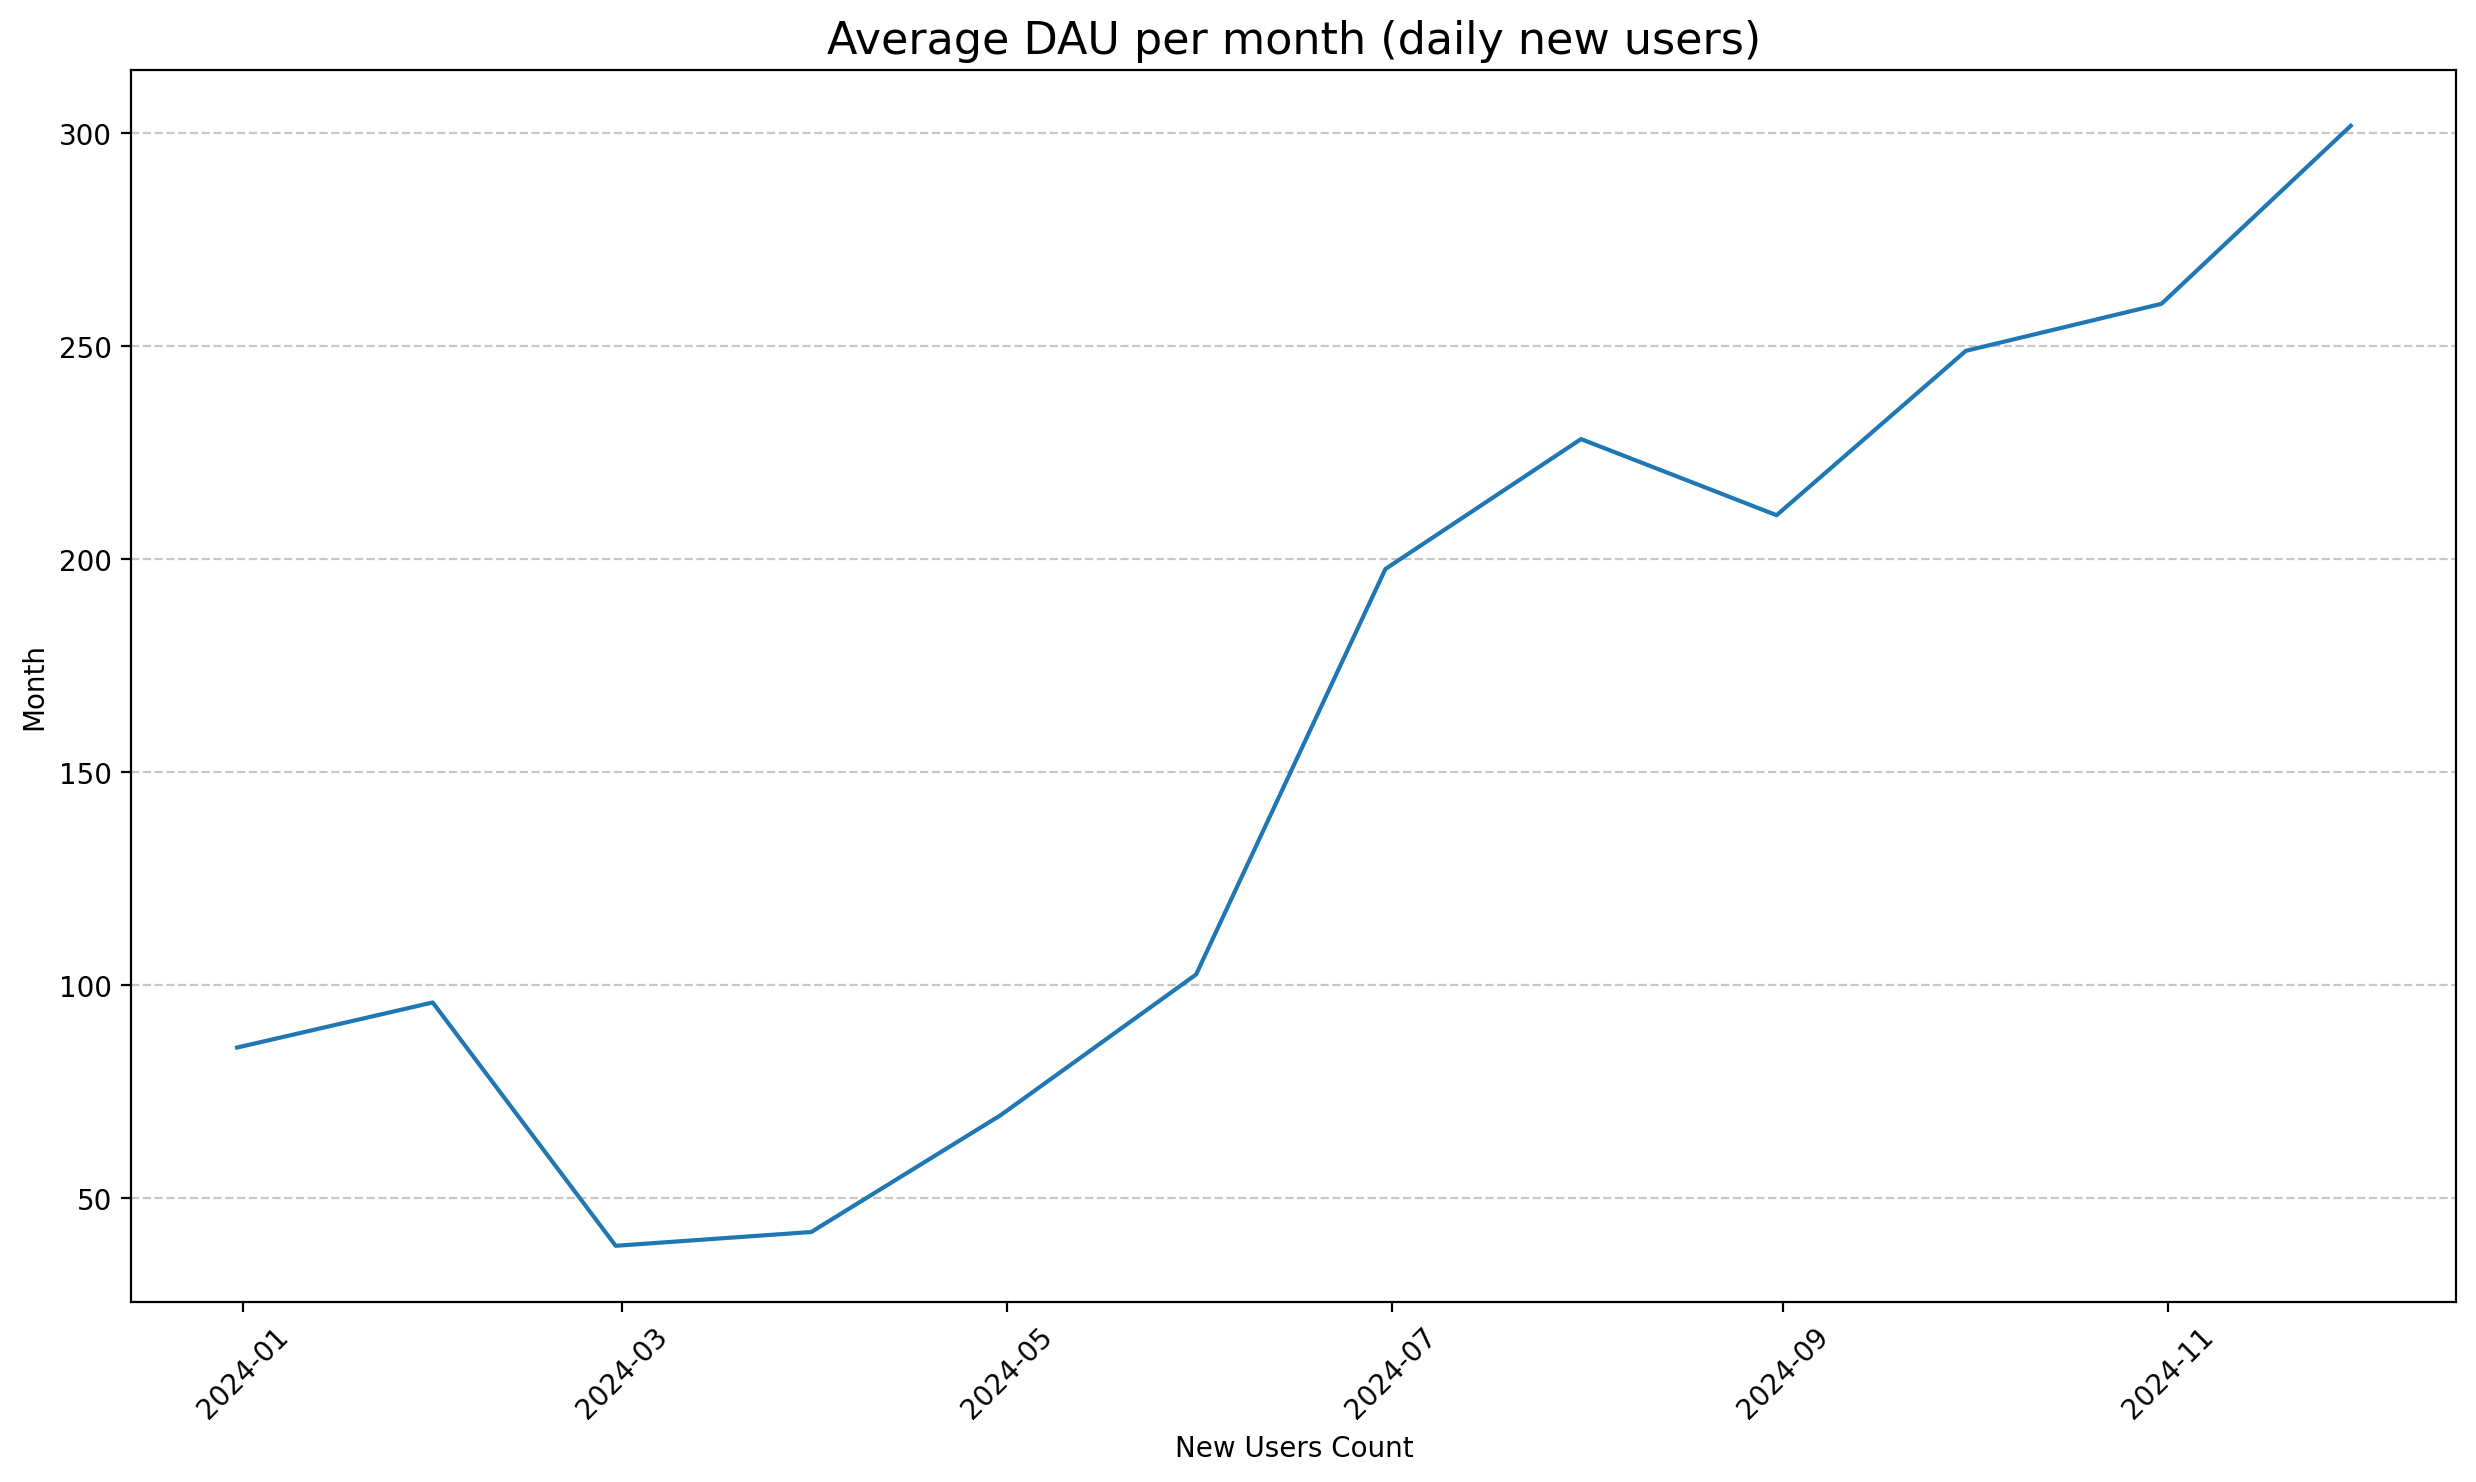

In [16]:
plt.figure(figsize=(15, 8), dpi=200)
sns.lineplot(data=avg_new_users_daily, x="date", y="customer_account_id", markers="o")


plt.title("Average DAU per month (daily new users)", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Month")
plt.xlabel("New Users Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

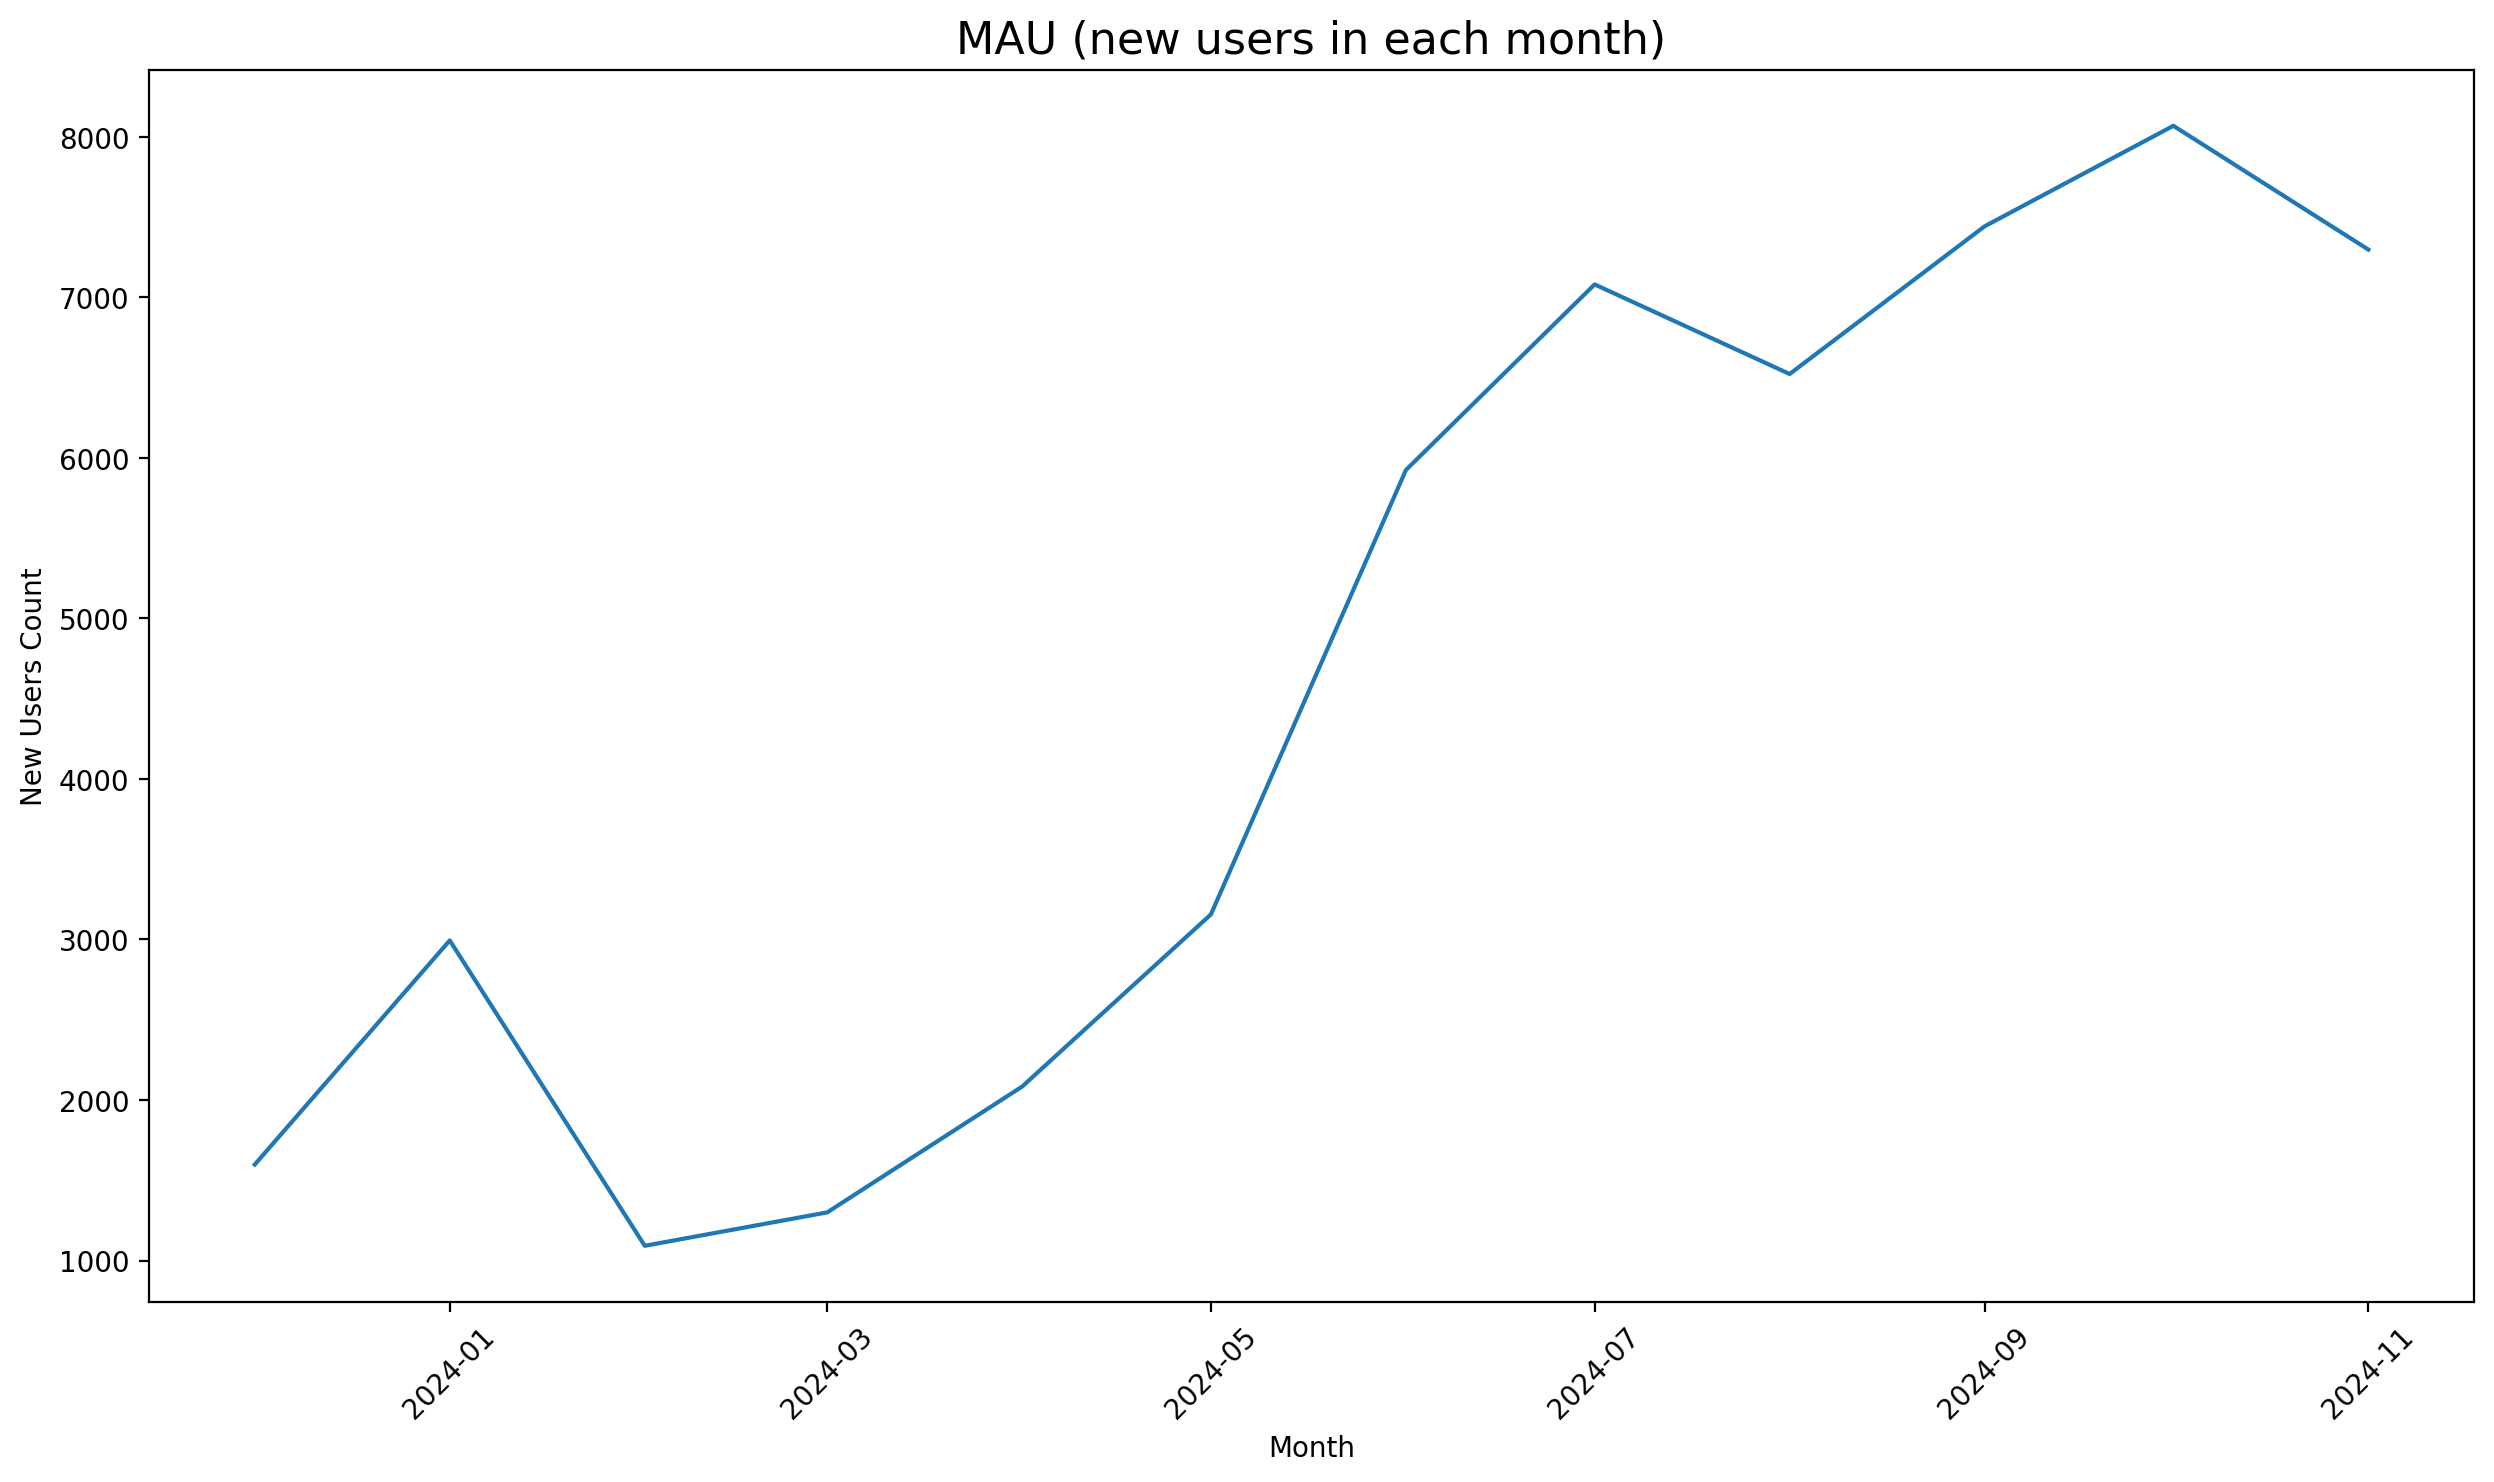

In [17]:
# Number of new users per each month 
monthly_new_users = first_payments.groupby("month_started_at")["customer_account_id"].nunique().reset_index()

plt.figure(figsize=(15, 8), dpi=200)
sns.lineplot(data=monthly_new_users, x="month_started_at", y="customer_account_id")

plt.title("MAU (new users in each month)", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("New Users Count")

plt.show()

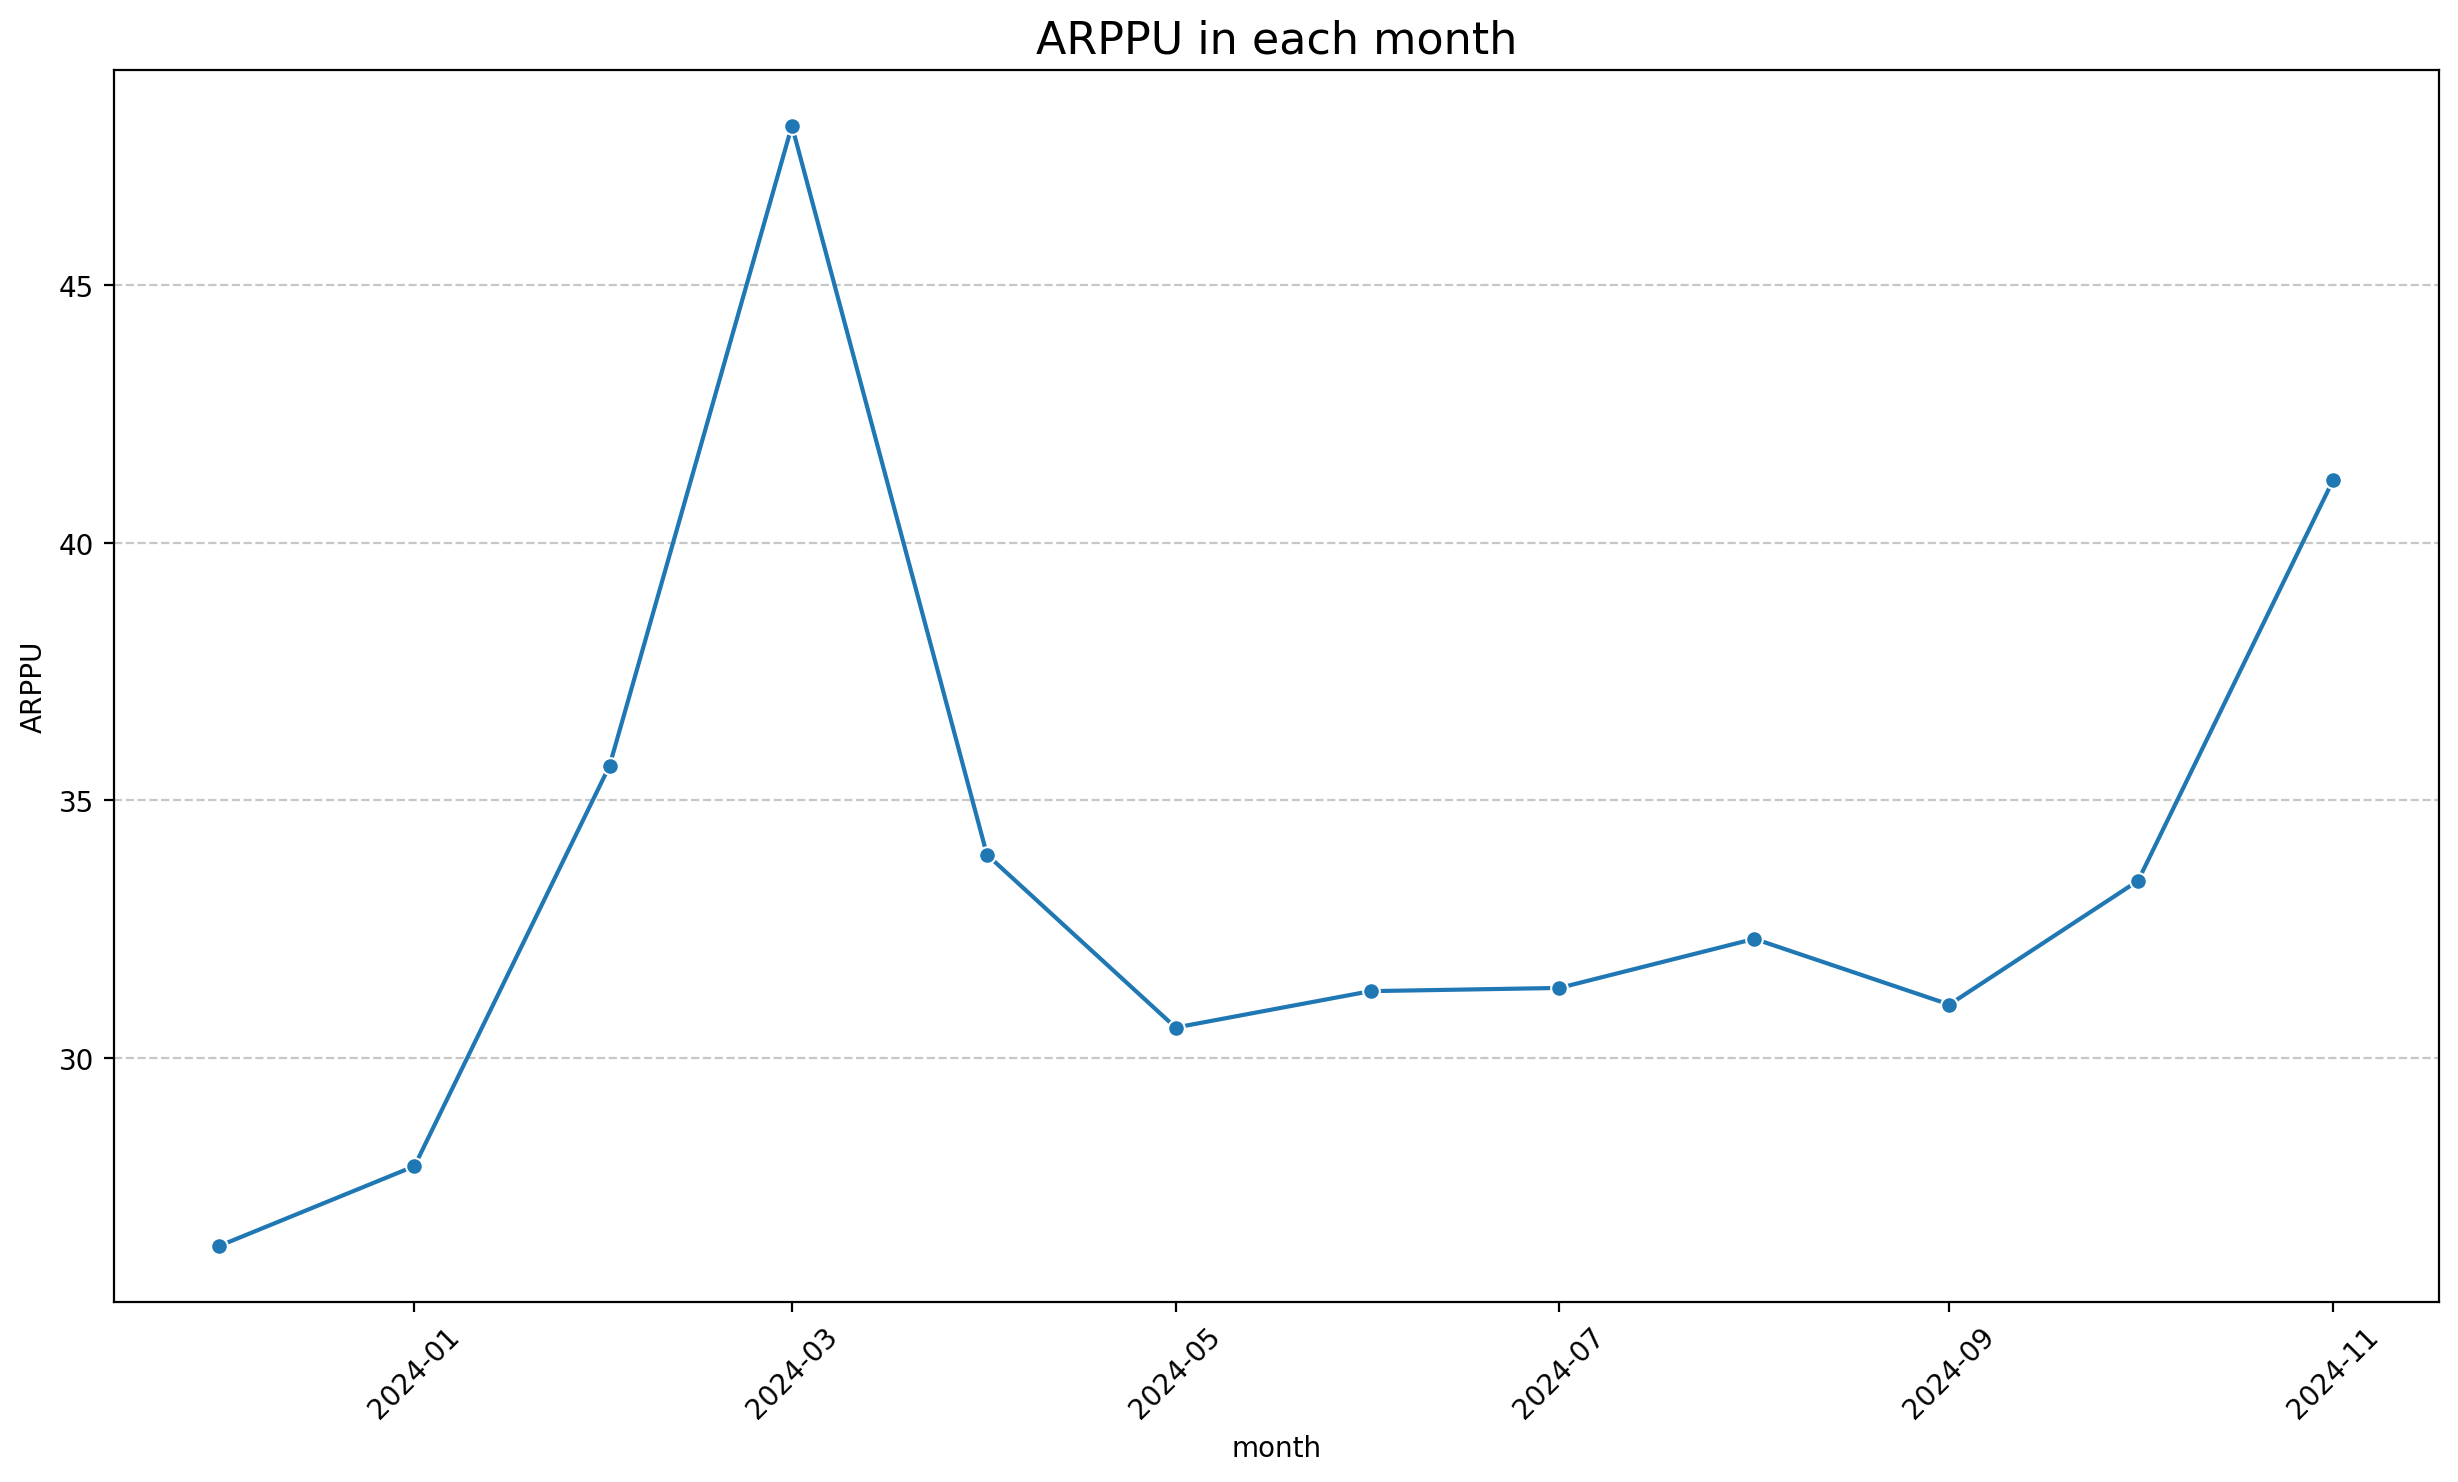

In [18]:
# ARPU
revenue = df[df["retry_count"] != 0]
monthly_revenue = revenue.groupby("month_started_at").aggregate({"gross_amount_usd": "sum"}).reset_index()
monthly_paying_customers = revenue.groupby("month_started_at")["customer_account_id"].nunique().reset_index()

monthly_arppu_data = pd.merge(monthly_revenue, monthly_paying_customers, on="month_started_at")

monthly_arppu_data.rename(columns={
    "month_started_at": "month",
    "gross_amount_usd": "revenue",
    "customer_account_id": "customer_count"
}, inplace=True)

monthly_arppu_data["ARPPU"] = monthly_arppu_data["revenue"] / monthly_arppu_data["customer_count"]

plt.figure(figsize=(15, 8), dpi=200)
sns.lineplot(data=monthly_arppu_data, x="month", y="ARPPU", marker="o")

plt.title("ARPPU in each month", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

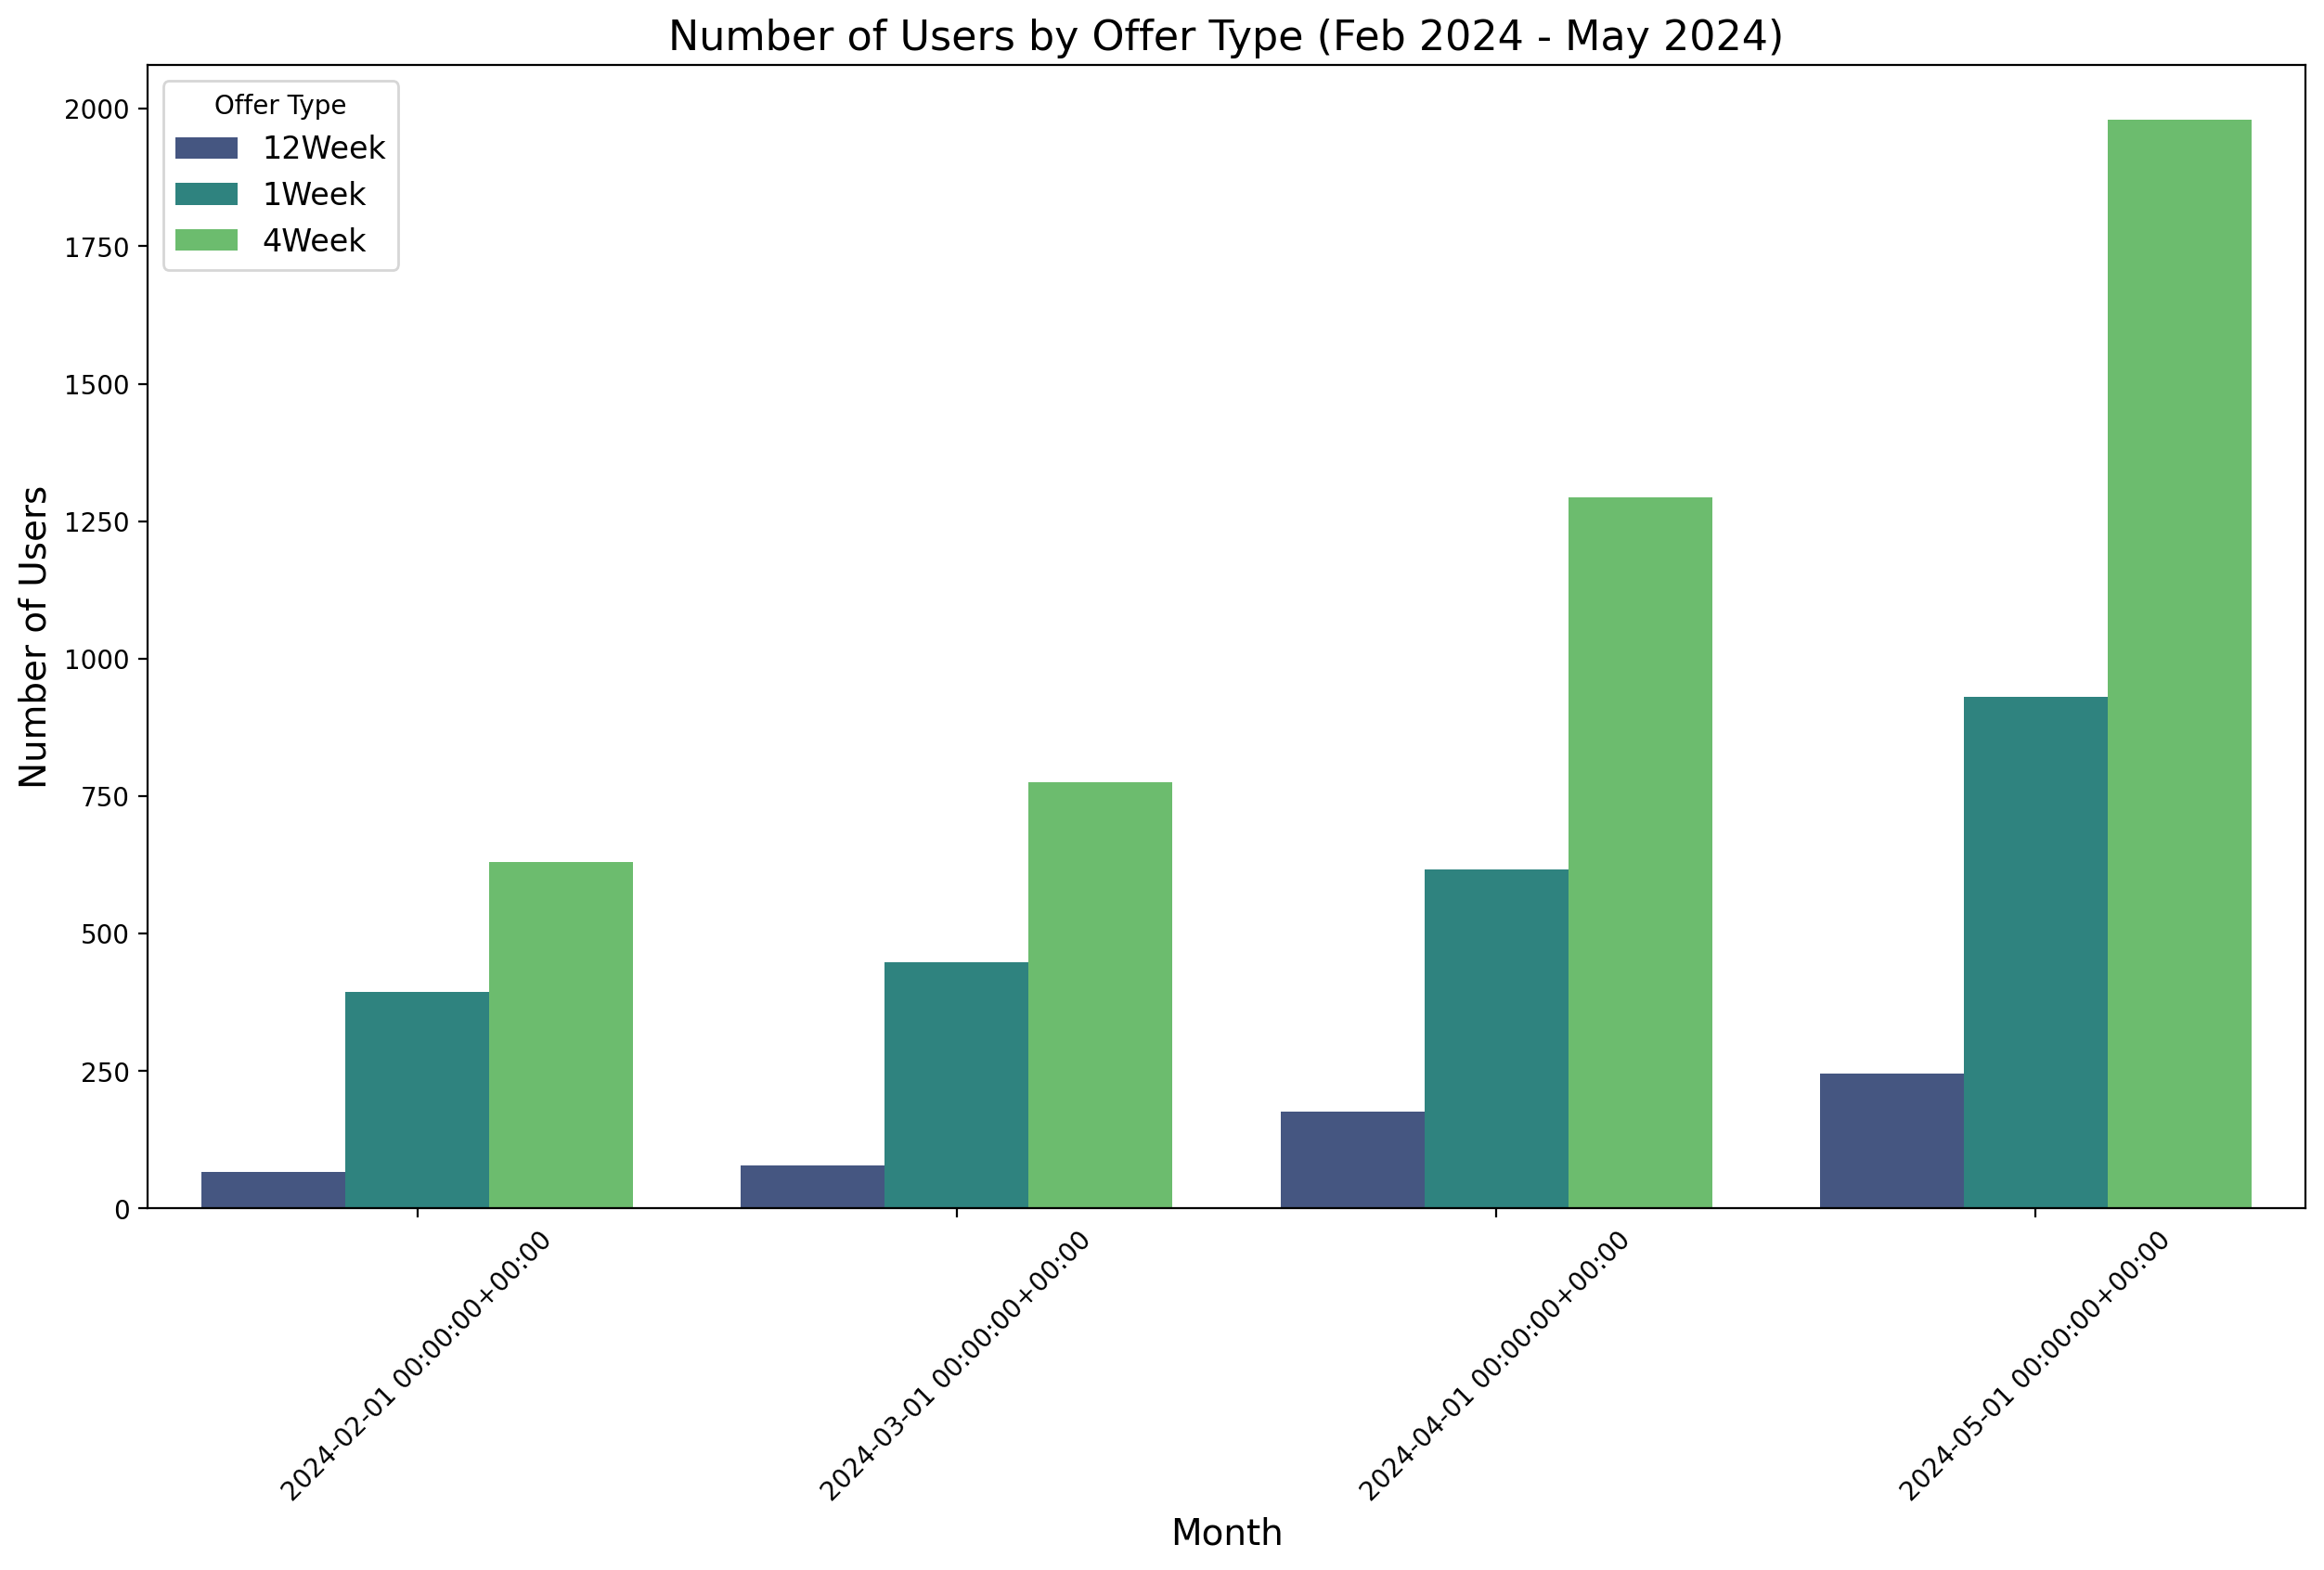

In [19]:
# Group by month and offer to count unique users
users_by_offer_month = first_payments.groupby(["month_started_at", "offer"])["customer_account_id"].nunique().reset_index()

# Rename columns for clarity
users_by_offer_month.rename(columns={"customer_account_id": "user_count"}, inplace=True)

# Filter data for the date range 2024-02 to 2024-05
filtered_data = users_by_offer_month[
    (users_by_offer_month["month_started_at"] >= "2024-02") &
    (users_by_offer_month["month_started_at"] <= "2024-05") & 
    (users_by_offer_month["offer"].isin(["1Week", "4Week", "12Week"]))
]

# Plot barplot
plt.figure(figsize=(15, 8), dpi=200)
sns.barplot(data=filtered_data, x="month_started_at", y="user_count", hue="offer", palette="viridis")

# Customize plot
plt.title("Number of Users by Offer Type (Feb 2024 - May 2024)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Offer Type", fontsize=12)

plt.show()

In [20]:
# Total ARPPU 
overall_arppu = revenue["gross_amount_usd"].sum() / revenue["customer_account_id"].nunique()
print(f"Overall ARPPU (Average Revenue Per Paying User): {overall_arppu.round(2)} USD")

Overall ARPPU (Average Revenue Per Paying User): 34.97 USD


In [21]:
recurring_bills = df[df["payment_type"] == "recurring"].copy()
first_subscriptions = df[df["payment_type"] == "first"].copy()

first_recurring_payments = recurring_bills.groupby("customer_account_id").first().reset_index()
successful_first_recurring = first_recurring_payments[first_recurring_payments["paid_count"] > 0]

total_subscriptions = len(first_subscriptions)

rebill_rate = len(successful_first_recurring) / total_subscriptions

print("Rebill Rate Analysis")
print(f"Rebill Rate: {np.round(rebill_rate * 100, 2)}%")
print(f"Successful First Recurring Payments: {len(successful_first_recurring)}")
print(f"Total First Subscriptions: {total_subscriptions}")

conversion_by_offer = {}
for offer in ["1Week", "4Week", "12Week"]:
    offer_subscriptions = first_subscriptions[first_subscriptions["offer"] == offer]
    offer_first_recurring = successful_first_recurring[
        successful_first_recurring["customer_account_id"].isin(offer_subscriptions["customer_account_id"])
    ]
    conversion_rate = len(offer_first_recurring) / len(offer_subscriptions) if len(offer_subscriptions) > 0 else 0
    conversion_by_offer[offer] = conversion_rate * 100

print("\nConversion Analysis by Offer")
for key, value in conversion_by_offer.items():
    print(f"{key}: {np.round(value, 2)}%")


Rebill Rate Analysis
Rebill Rate: 34.41%
Successful First Recurring Payments: 18782
Total First Subscriptions: 54587

Conversion Analysis by Offer
1Week: 33.59%
4Week: 36.83%
12Week: 22.18%


In [22]:
df["utm"] = np.where(df["utm_source"].isin(["google", "TikTok", "facebook", "unionapps"]), df["utm_source"], "others")

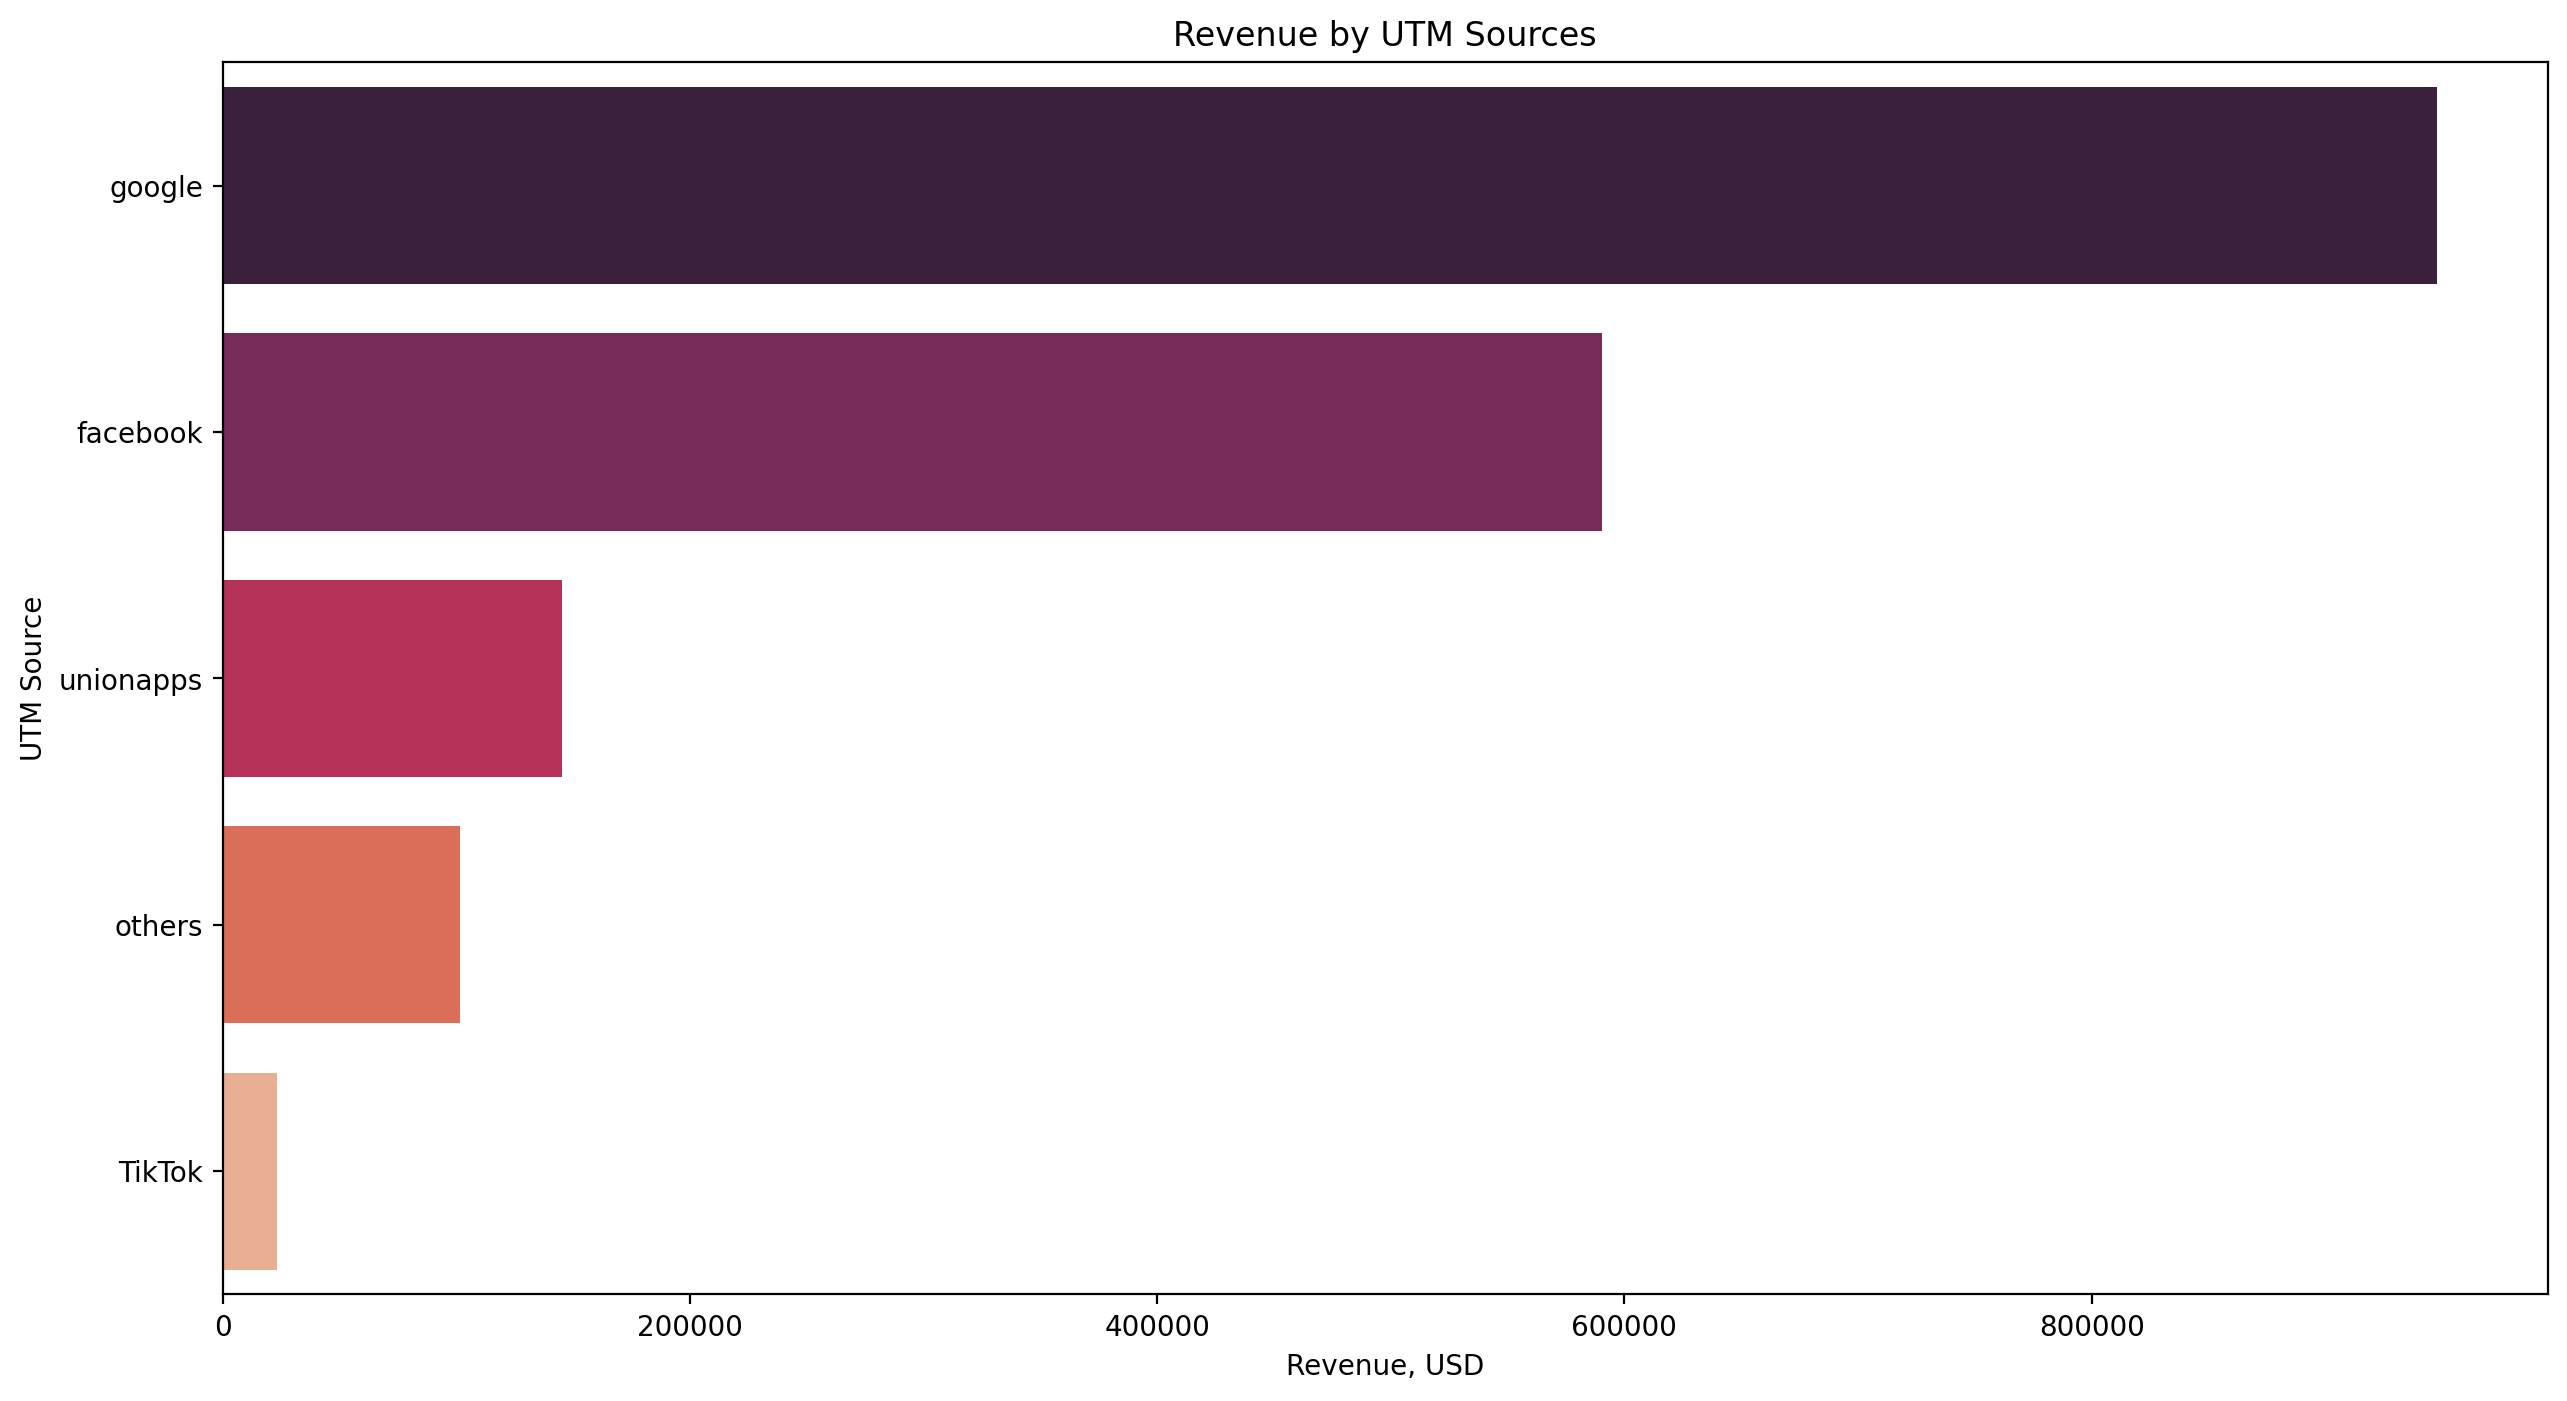

In [23]:
# Revenue from users came from each utm source
df_offers = df[df["offer"].isin(["1Week", "4Week", "12Week"])]
revenue_by_utm = df_offers.groupby("utm").aggregate({"gross_amount_usd": "sum"}).reset_index().sort_values(by="gross_amount_usd", ascending=False)

plt.figure(figsize=(15, 8), dpi=200)
sns.barplot(data=revenue_by_utm, x="gross_amount_usd", y="utm", palette="rocket")

plt.title("Revenue by UTM Sources")
plt.xlabel("Revenue, USD")
plt.ylabel("UTM Source")

plt.show()

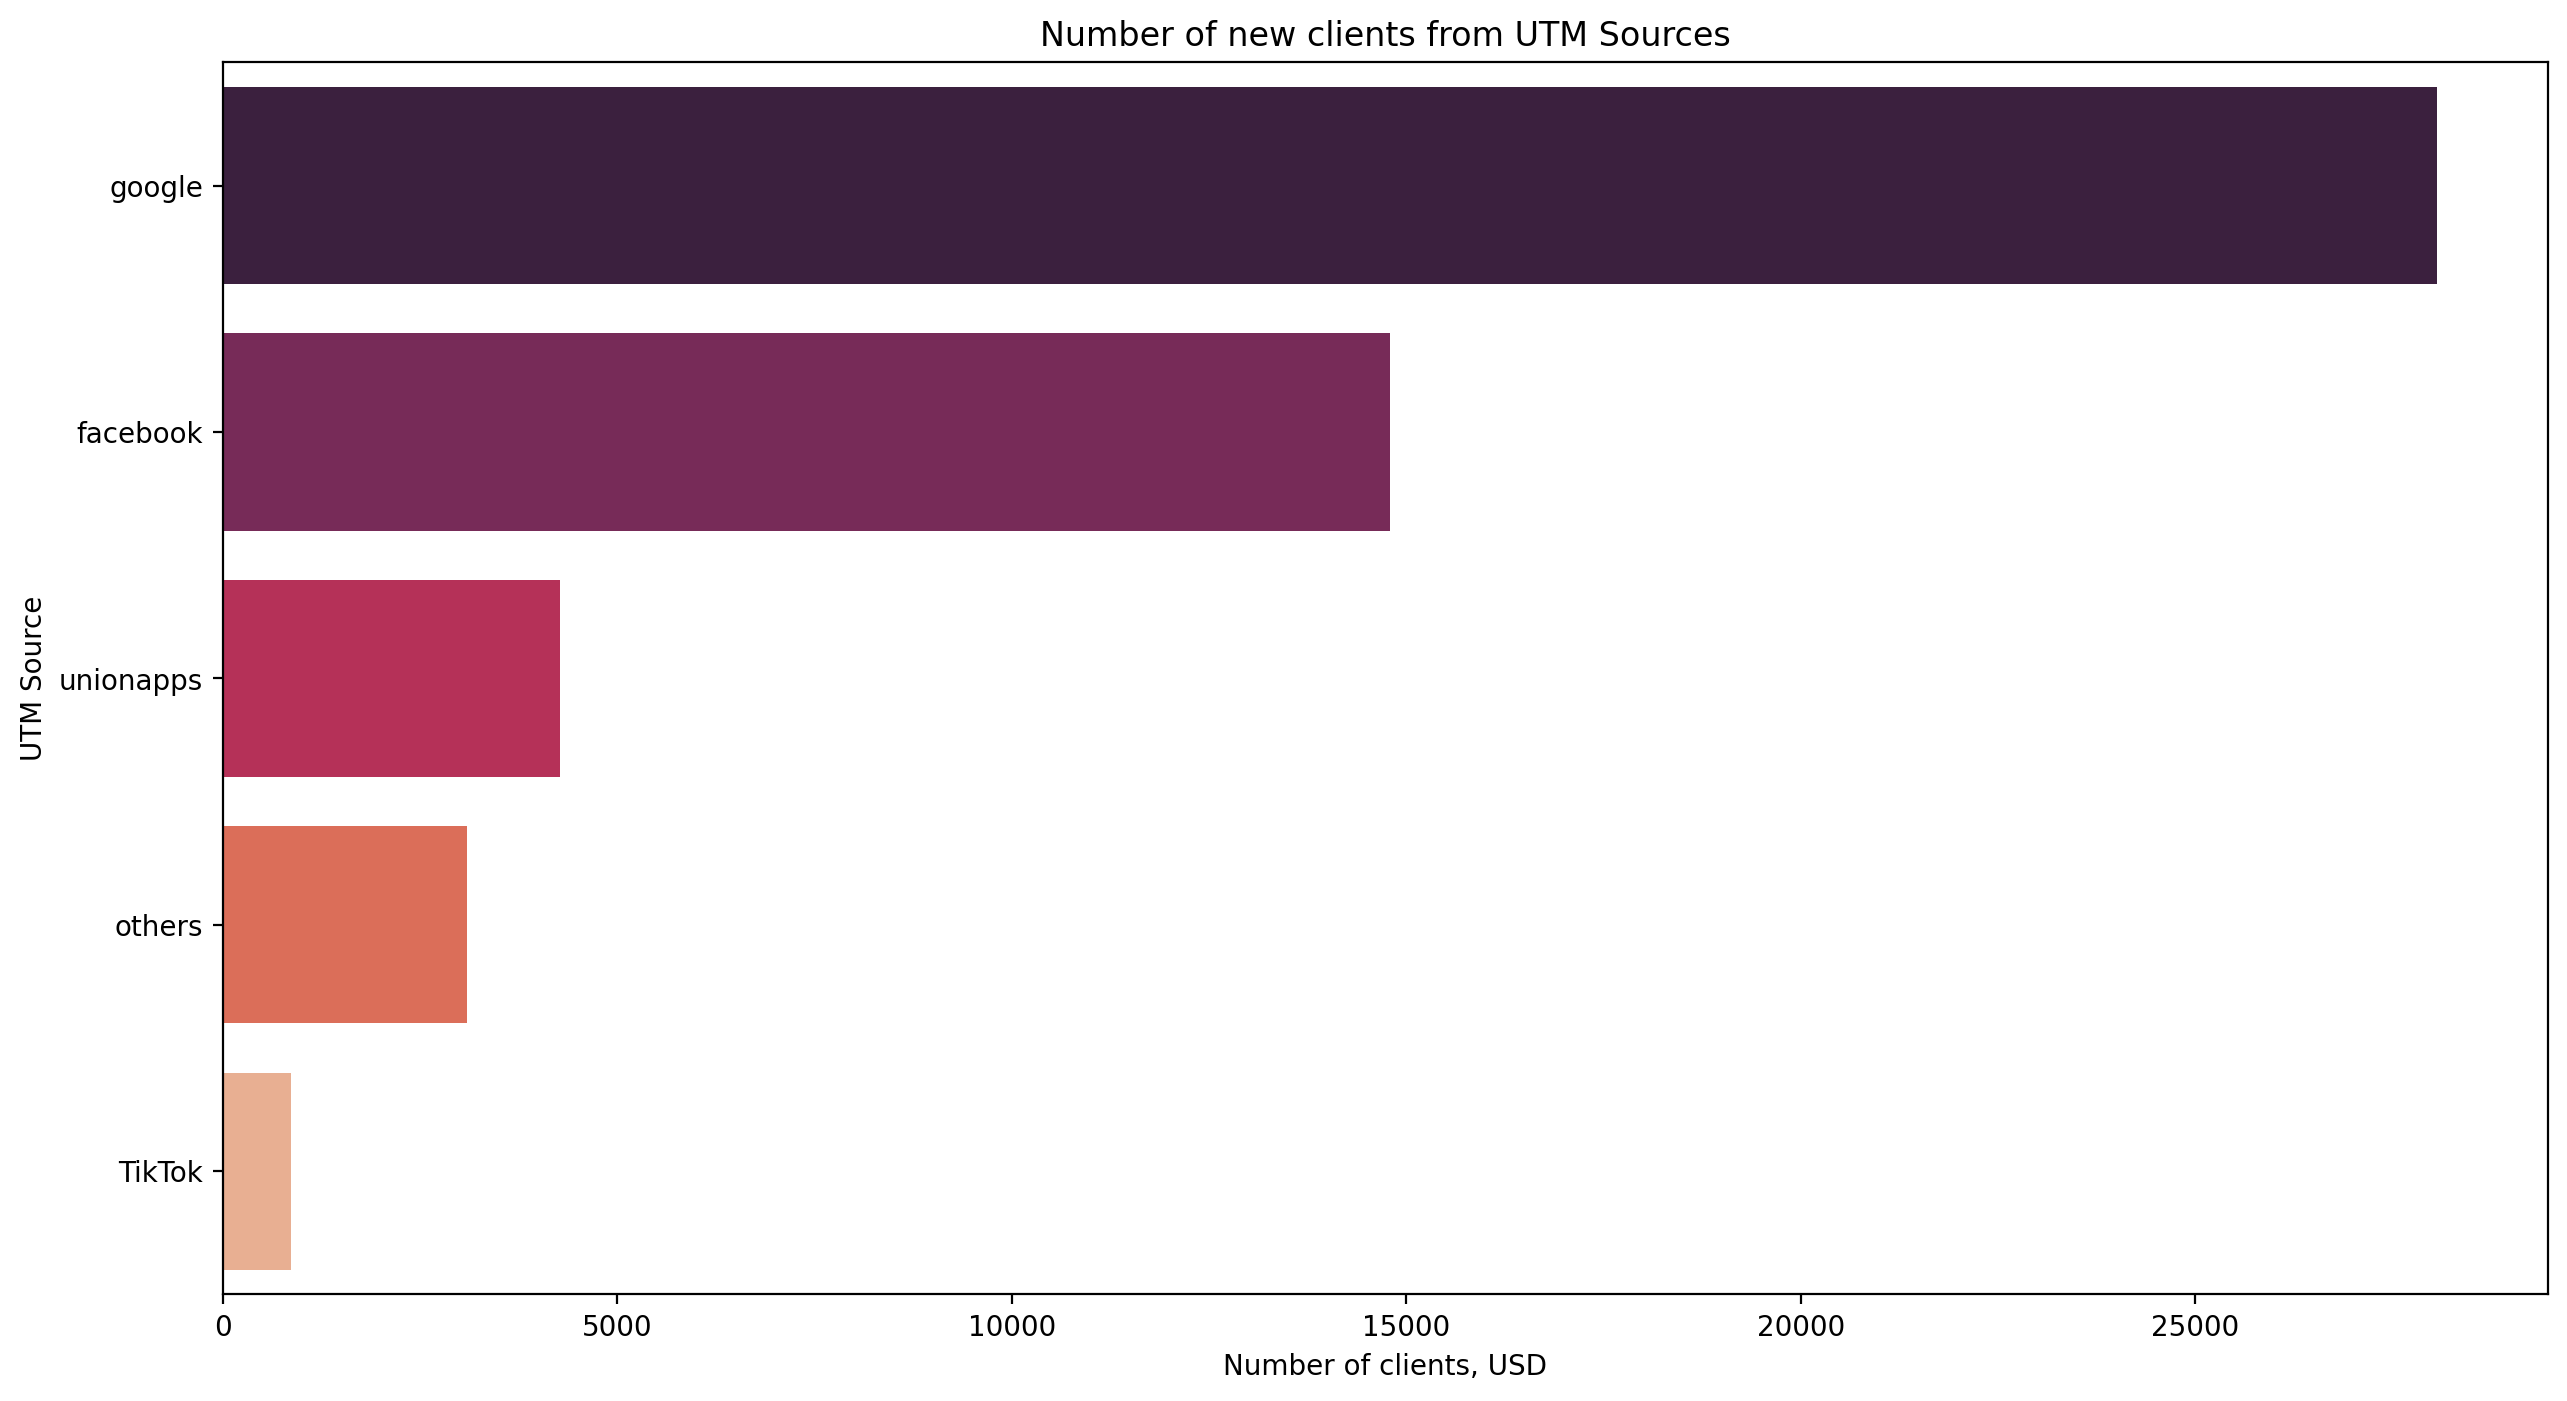

In [24]:
utm_attract = df_offers[df_offers["payment_type"] == "first"].groupby(["utm"]).aggregate({"order_id": "count"}).reset_index().sort_values("order_id", ascending=False)

plt.figure(figsize=(15, 8), dpi=200)
sns.barplot(data=utm_attract, x="order_id", y="utm", palette="rocket")

plt.title("Number of new clients from UTM Sources")
plt.xlabel("Number of clients, USD")
plt.ylabel("UTM Source")

plt.show()

In [25]:
# How many new clients subscribe for each subscription plan
df_offers[df_offers["payment_type"] == "first"].groupby("offer").aggregate({"customer_account_id": "nunique"}).reset_index()

,offer,customer_account_id
0,12Week,4286
1,1Week,16325
2,4Week,30462


In [26]:
def calculate_rebill_proba(df):
    df["own_started_at"] = pd.to_datetime(df["own_started_at"], errors="coerce")
    df = df[df["payment_type"] != "upsell"].sort_values(["customer_account_id", "own_started_at"])
    first_payment_dates = df[df["payment_type"] == "first"].groupby("customer_account_id")["own_started_at"].first()

    df = df.merge(first_payment_dates.rename("first_payment_date"), on="customer_account_id", how="left")
    df_after_first = df[df["own_started_at"] > df["first_payment_date"]]
    df_after_first["is_rebilled"] = ((df_after_first["payment_type"] == "recurring") & 
                                     (df_after_first["retry_count"] == 0)).astype(int)
    df_after_first["total_attempts"] = df_after_first["retry_count"].fillna(0) + 1

    result = df_after_first.groupby("customer_account_id").agg(
        total_recurrings=("is_rebilled", "sum"),
        total_attempts=("total_attempts", "sum")
    ).reset_index()
    result["rebill_proba"] = result["total_recurrings"] / result["total_attempts"]
    result.drop(["total_recurrings", "total_attempts"], axis=1, inplace=True)

    return result

result_df = calculate_rebill_proba(df)
result_df = result_df.merge(df, how="inner", on="customer_account_id")

result_df.head()

,customer_account_id,rebill_proba,own_started_at,order_id,amount_usd,gross_amount_usd,month,offer,currency,payment_type,...,date,geo,paid_count,retry_count,month_started_at,utm_source,trial_period,period,next_billing_date,utm
0,5953.0,0.0,2024-06-16 09:18:26+00:00,pay_xvtslwcfxkeebgfucxbhcuopz4,1947.0,19.47,2024-06-01 00:00:00+00:00,4Week,USD,recurring,...,2024-06-16 00:00:00+00:00,WW,1,4,2024-06-01 00:00:00+00:00,facebook,28,28,2024-07-14 00:00:00+00:00,facebook
1,5953.0,0.0,2024-05-06 05:03:51+00:00,pay_klopodovnm6uvbpsdcxcsladcq,1519.0,15.19,2024-05-01 00:00:00+00:00,4Week,USD,first,...,2024-05-06 00:00:00+00:00,WW,0,0,2024-05-01 00:00:00+00:00,facebook,28,28,2024-06-03 00:00:00+00:00,facebook
2,8637.0,0.0,2024-07-13 05:00:00+00:00,pay_q7wytvsvnxkudjjawyr3ijhb74,3895.0,38.95,2024-10-01 00:00:00+00:00,1Week,USD,recurring,...,2024-10-18 00:00:00+00:00,WW,3,0,2024-07-01 00:00:00+00:00,google,7,28,2024-11-15 00:00:00+00:00,google
3,8637.0,0.0,2024-07-13 05:00:00+00:00,pay_w5fzpqdezj6ebefbtccsqbcdra,1947.0,19.47,2024-09-01 00:00:00+00:00,1Week,USD,recurring,...,2024-09-20 00:00:00+00:00,WW,2,4,2024-07-01 00:00:00+00:00,google,7,28,2024-10-18 00:00:00+00:00,google
4,8637.0,0.0,2024-07-13 05:56:57+00:00,pay_gqzi6z3edetenlh2vi3m4zgzee,693.0,6.93,2024-07-01 00:00:00+00:00,1Week,USD,first,...,2024-07-13 00:00:00+00:00,WW,0,0,2024-07-01 00:00:00+00:00,google,7,28,2024-07-20 00:00:00+00:00,google


In [27]:
data = result_df.groupby("customer_account_id").aggregate({"rebill_proba": "mean"}).reset_index()
data

,customer_account_id,rebill_proba
0,5953.0,0.0
1,8637.0,0.0
2,8653.0,1.0
3,14912.0,1.0
4,16152.0,0.0
...,...,...
9390,786225.0,1.0
9391,992943.0,0.0
9392,1011419.0,0.0
9393,1037640.0,0.0


In [28]:
agg_rules = {
    "own_started_at": "first",
    "order_id": lambda x: ", ".join(x.unique()),
    "amount_usd": "mean",
    "gross_amount_usd": "mean",
    "offer": lambda x: x.mode()[0] if not x.mode().empty else None,
    "currency": lambda x: x.mode()[0] if not x.mode().empty else None,
    "payment_type": lambda x: x.mode()[0] if not x.mode().empty else None,
    "payment_method": lambda x: x.mode()[0] if not x.mode().empty else None,
    "card_brand": lambda x: x.mode()[0] if not x.mode().empty else None,
    "week_day": lambda x: x.mode()[0] if not x.mode().empty else None,
    "bin": "first",
    "date": "max",
    "channel": lambda x: x.mode()[0] if not x.mode().empty else None,
    "geo_country": lambda x: x.mode()[0] if not x.mode().empty else None,
    "card_country": lambda x: x.mode()[0] if not x.mode().empty else None,
    "geo": lambda x: x.mode()[0] if not x.mode().empty else None,
    "paid_count": "sum",
    "retry_count": "sum",
    "utm": lambda x: x.mode()[0] if not x.mode().empty else None,
    "trial_period": "mean",
    "period": "mean",
    "next_billing_date": "max"
}

finalized_df = result_df.groupby("customer_account_id").agg(agg_rules).reset_index()


In [29]:
finalized_df = finalized_df.merge(data, on="customer_account_id", how="left")
finalized_df.head()

,customer_account_id,own_started_at,order_id,amount_usd,gross_amount_usd,offer,currency,payment_type,payment_method,card_brand,...,geo_country,card_country,geo,paid_count,retry_count,utm,trial_period,period,next_billing_date,rebill_proba
0,5953.0,2024-06-16 09:18:26+00:00,"pay_xvtslwcfxkeebgfucxbhcuopz4, pay_klopodovnm...",1733.0,17.33,4Week,USD,first,card,Visa,...,None,USD,WW,1,4,facebook,28.0,28.0,2024-07-14 00:00:00+00:00,0.0
1,8637.0,2024-07-13 05:00:00+00:00,"pay_q7wytvsvnxkudjjawyr3ijhb74, pay_w5fzpqdezj...",2364.0,23.64,1Week,USD,recurring,card,Visa,...,KH,KH,WW,6,6,google,7.0,28.0,2024-11-15 00:00:00+00:00,0.0
2,8653.0,2024-08-18 08:19:47+00:00,"pay_pedtnl2i3miutpagcwqycdnlga, pay_b42z6ycoad...",2707.0,27.07,4Week,USD,first,applepay,Visa,...,NZ,USD,T1,1,0,facebook,28.0,28.0,2024-09-15 00:00:00+00:00,1.0
3,14912.0,2024-09-09 08:34:42+00:00,"pay_lyowvvrzxm4e7bmzhfkcp7h6ju, pay_5i5tpo3jky...",2294.0,22.94,1Week,USD,first,card,Mastercard,...,MV,USD,WW,1,0,google,7.0,28.0,2024-10-07 00:00:00+00:00,1.0
4,16152.0,2024-05-25 12:11:58+00:00,"pay_r5t4s2pdzyeezl5wcw57v7kp2y, pay_hkb67htkhg...",3186.0,31.86,12Week,USD,first,card,Visa,...,MG,USD,WW,1,3,google,84.0,84.0,2024-11-24 00:00:00+00:00,0.0


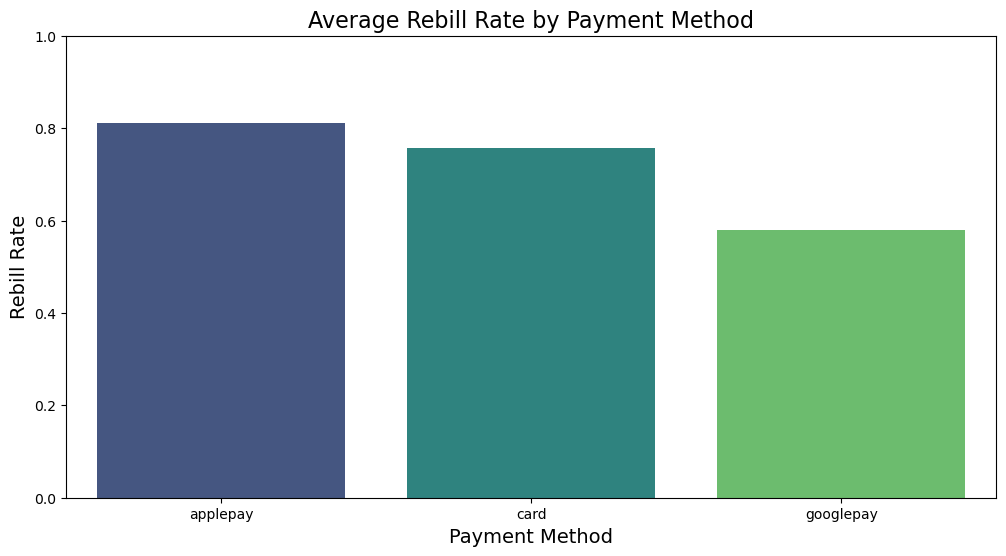

In [30]:
rebill_rate_by_payment = finalized_df.groupby("payment_method")["rebill_proba"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=rebill_rate_by_payment, x="payment_method", y="rebill_proba", palette="viridis")
plt.title("Average Rebill Rate by Payment Method", fontsize=16)
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Rebill Rate", fontsize=14)
plt.ylim(0, 1)

plt.show()


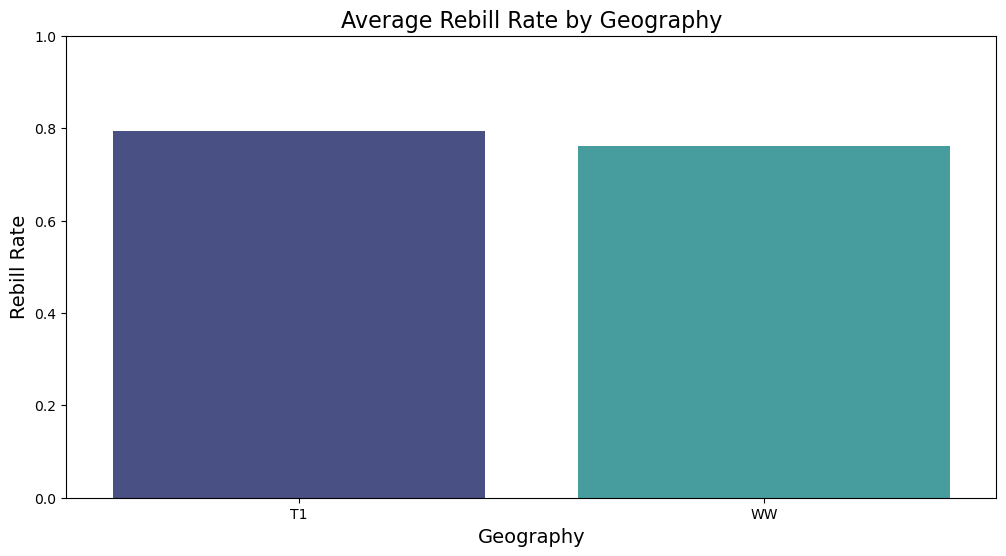

In [31]:
rebill_rate_by_geo = finalized_df.groupby("geo")["rebill_proba"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=rebill_rate_by_geo, x="geo", y="rebill_proba", palette="mako")
plt.title("Average Rebill Rate by Geography", fontsize=16)
plt.xlabel("Geography", fontsize=14)
plt.ylabel("Rebill Rate", fontsize=14)
plt.ylim(0, 1)

plt.show()


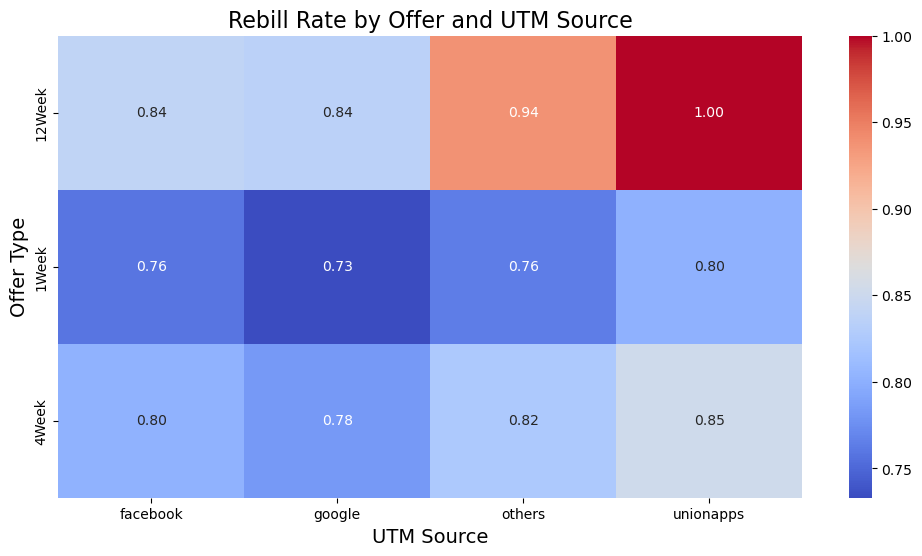

In [32]:
rebill_rate_heatmap = finalized_df[finalized_df["offer"].isin(["1Week", "4Week", "12Week"])].pivot_table(
    values="rebill_proba", index="offer", columns="utm", aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(rebill_rate_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Rebill Rate by Offer and UTM Source", fontsize=16)
plt.xlabel("UTM Source", fontsize=14)
plt.ylabel("Offer Type", fontsize=14)
plt.show()


In [33]:
# Feature Generation
finalized_df["days_after_first"] = (finalized_df["date"] - finalized_df["own_started_at"]).dt.days + 2

In [34]:
finalized_df["falls_on_weekend"] = finalized_df["next_billing_date"].dt.day_of_week.isin([5, 6]).astype(int)

In [35]:
finalized_df["amount_paid"] = finalized_df["gross_amount_usd"] * finalized_df["paid_count"]

In [36]:
finalized_df["is_domestic_payment"] = (finalized_df["geo_country"] == finalized_df["card_country"]).astype(int)

In [37]:
finalized_df["is_long_termed"] = (finalized_df["period"] > finalized_df["trial_period"]).astype(int)

In [38]:
# Modeling
columns_to_drop = ["customer_account_id", "own_started_at", "order_id", "bin", "date", "next_billing_date", "geo_country", "card_country"]
data = finalized_df.drop(columns_to_drop, axis=1, errors="ignore")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9395 entries, 0 to 9394
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount_usd           9395 non-null   float64
 1   gross_amount_usd     9395 non-null   float64
 2   offer                9395 non-null   object 
 3   currency             9395 non-null   object 
 4   payment_type         9395 non-null   object 
 5   payment_method       9395 non-null   object 
 6   card_brand           9395 non-null   object 
 7   week_day             9395 non-null   object 
 8   channel              9395 non-null   object 
 9   geo                  9395 non-null   object 
 10  paid_count           9395 non-null   int64  
 11  retry_count          9395 non-null   int64  
 12  utm                  9395 non-null   object 
 13  trial_period         9395 non-null   float64
 14  period               9395 non-null   float64
 15  rebill_proba         9395 non-null   f

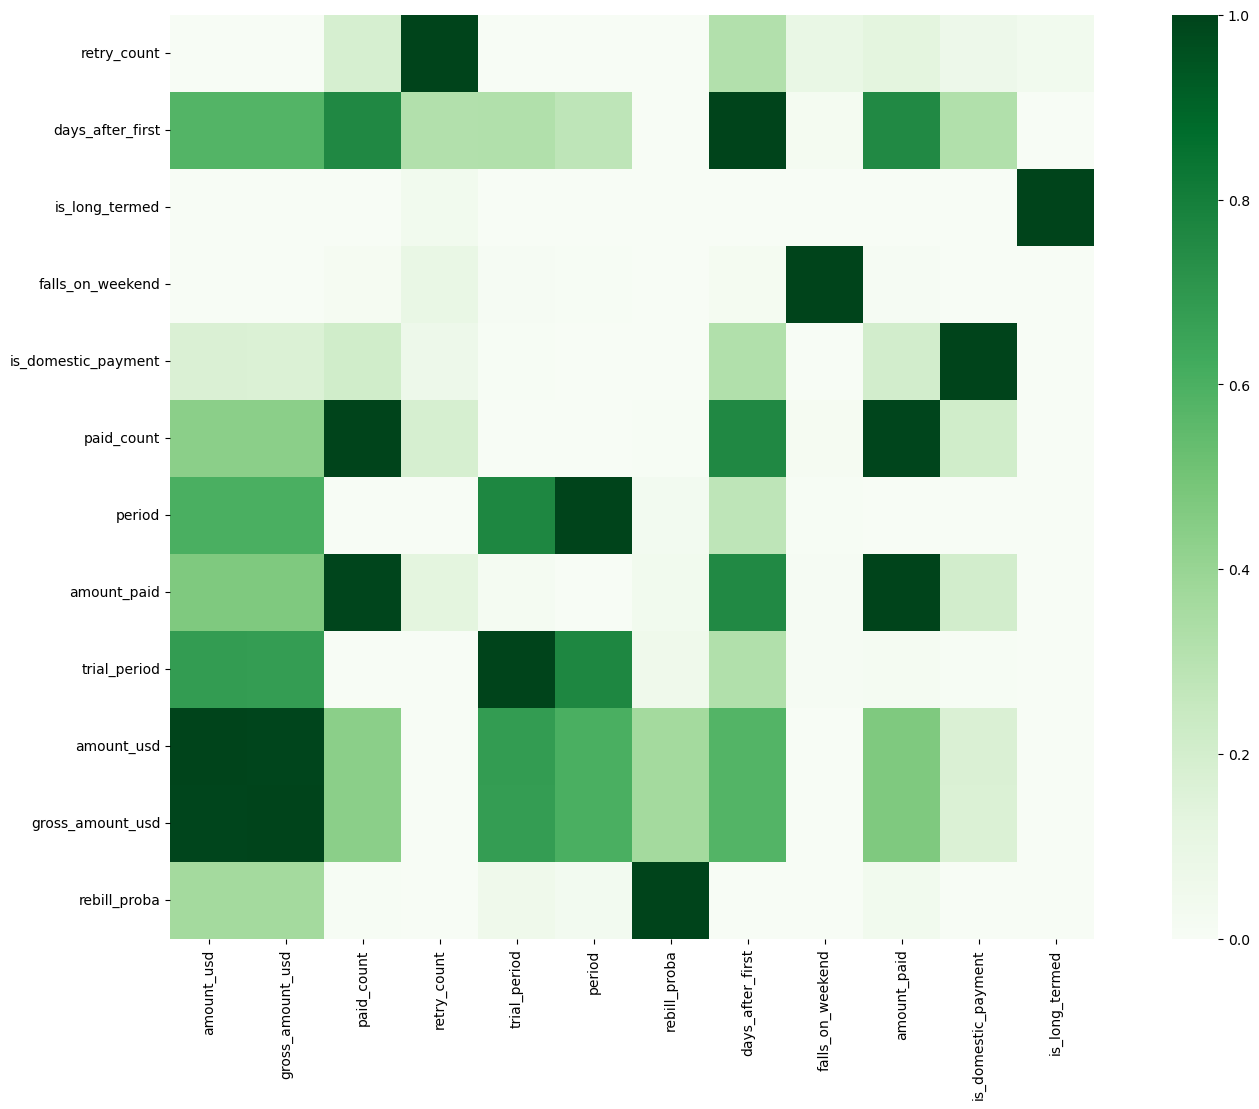

In [39]:
corrs = data.corr(numeric_only=True).round(3).sort_values("rebill_proba")
plt.figure(figsize=(20, 12))
sns.heatmap(corrs, cmap="Greens", square=True, annot=False, vmin=0)

plt.show()

interval columns not set, guessing: ['amount_usd', 'gross_amount_usd', 'paid_count', 'retry_count', 'trial_period', 'period', 'rebill_proba', 'days_after_first', 'falls_on_weekend', 'amount_paid', 'is_domestic_payment', 'is_long_termed']


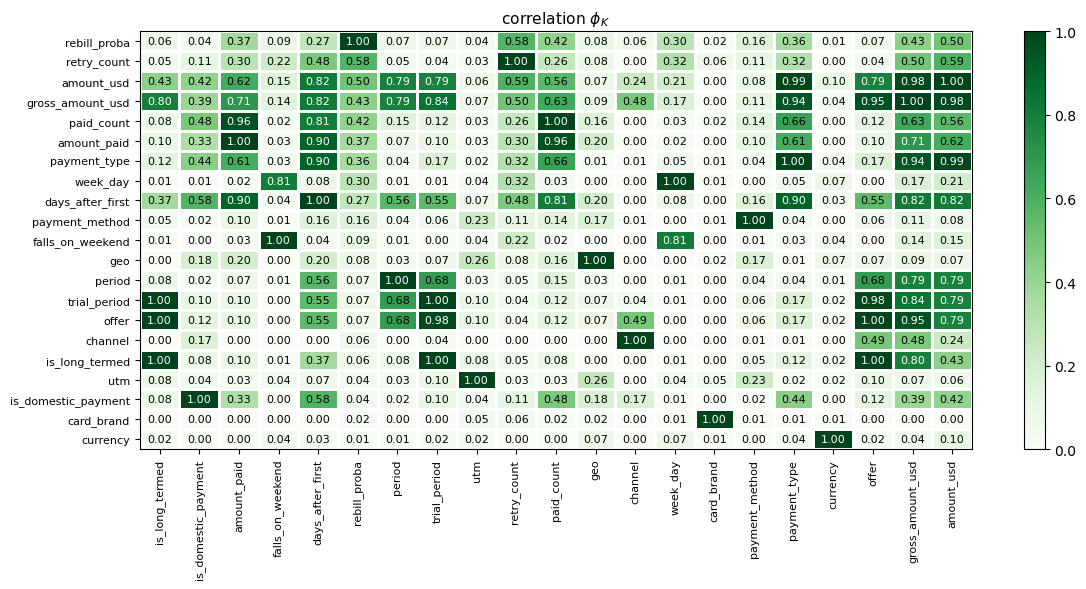

In [40]:
overview = data.phik_matrix().round(2).sort_values("rebill_proba")

plot_correlation_matrix(overview.values,
                        x_labels=overview.columns,
                        y_labels=overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, 
                        figsize=(12, 6))

plt.tight_layout()
plt.show()

interval columns not set, guessing: ['amount_usd', 'gross_amount_usd', 'paid_count', 'retry_count', 'trial_period', 'period', 'rebill_proba', 'days_after_first', 'falls_on_weekend', 'amount_paid', 'is_domestic_payment', 'is_long_termed']


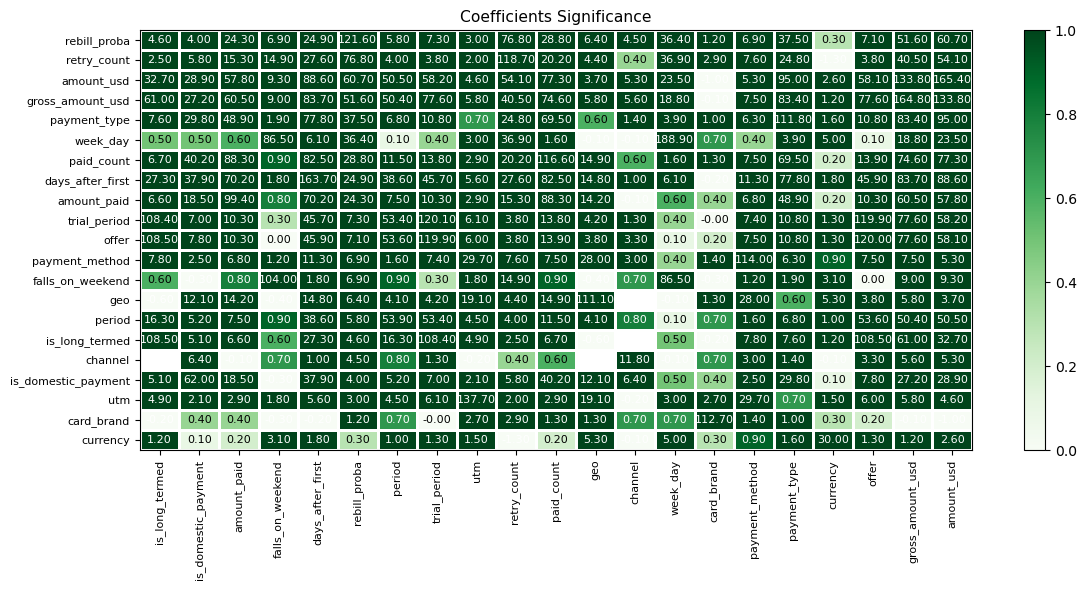

In [41]:
significance_overview = data.significance_matrix().fillna(0).round(1).sort_values("rebill_proba")

plot_correlation_matrix(significance_overview.values,
                        x_labels=significance_overview.columns,
                        y_labels=significance_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Coefficients Significance",
                        usetex=False,
                        fontsize_factor=0.8, 
                        figsize=(12, 6))

plt.tight_layout()
plt.show()